# Working with SWOT and NOAA data

### Introduction
The purpose of this notebook is to plot the SWOT data and then overlay the drifter on top of it.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 136
  - https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period :  30-03-2023 to 09-07-2023

- SWOT Data:
  - Source: Altimetry measurements,  L3 SWOT (NASA/CNES), Temporal resolution: Every Time, Spatial resolution: 
  - Data Product: NRT SWOT KaRIn & nadir Global Ocean swath SSALTO/DUACS Sea Surface Height L3 product
  - link :  DOI associated : https://doi.org/10.24400/527896/a01-2023.017
  - download data : https://filesender.renater.fr/?s=download&token=02607a61-c1aa-4f00-8b4e-9c26454c9260
  - Periode : period :  30-03-2023 to 09-07-2023
  - DUACS is the operationnal multimission production system of altimeter data developed by CNES/CLS. It features multimission products based on all altimetry satellites from GEOSAT to Jason-3 for a total of 100 years of cumulated data.
 
### Tasks

#### 1. Visualization of the SWOT parameter and dridter trajectory.
 - Plotting the drifter's trajectory over a trace of SSH.

## Import packages

The package called ```utils``` is a local. It contains useful functions, and functions to be completed when requested.

In [267]:
import xarray as xr
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import numpy as np

## File location and name

In [268]:
dir_data = 'C:/Users/PC-M2OA/Desktop/stage_master/Final_Swot_module/'
name_winter = 'SWOT_L3_LR_SSH_Expert_572_018_20230704T211232_20230704T220337_v0.3.nc'

ds = xr.open_dataset(dir_data+name_winter)

## Plot

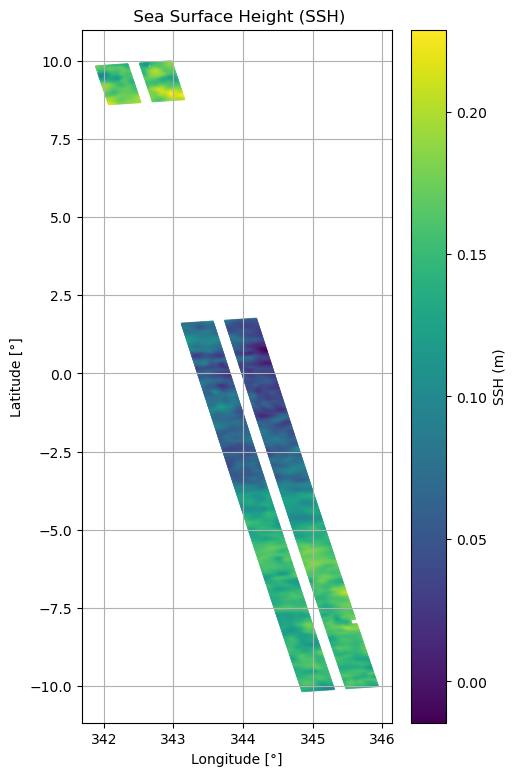

In [269]:
latmin, latmax = -10, 10
indlat = np.argwhere( (ds.latitude.values[:,0]>latmin) & (ds.latitude.values[:,0]<latmax) )
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]
plt.figure(figsize=(5,9))
plt.scatter(lon, lat,c=ssh, s = 0.2)
plt.colorbar(label='SSH (m)')            

# Title and axes labels
plt.title(' Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Extract Coordinates and Variables

## Read Drifter Data

In [270]:
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

## Extract Coordinates and Variables

In [271]:
ve_curr = ds_w.ve.values
vn_curr = ds_w.vn.values
sst = ds_w.sst.values
lon = ds_w.longitude.values
lat = ds_w.latitude.values
time = ds_w.time.values   

## Creation of Pandas Array for Drifter Data

In [272]:
data = {
    'Longitude': lon,
    'Latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)

## Drifters and SWOT trace

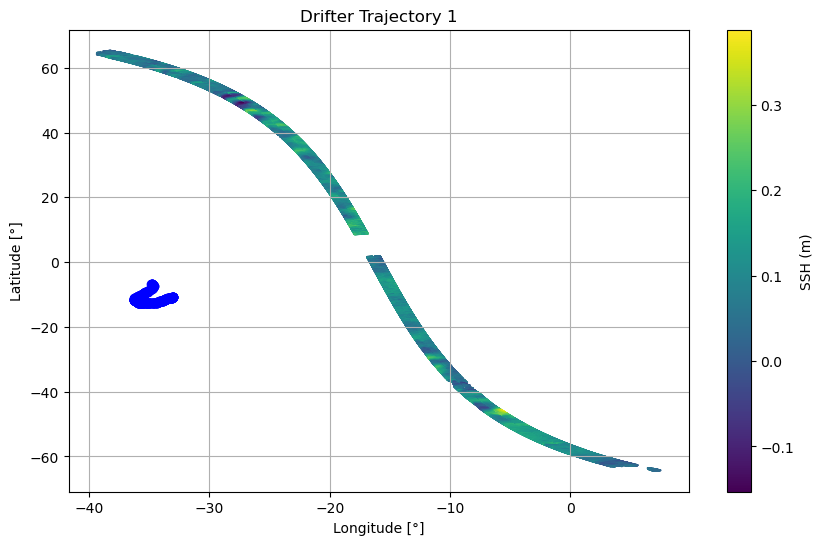

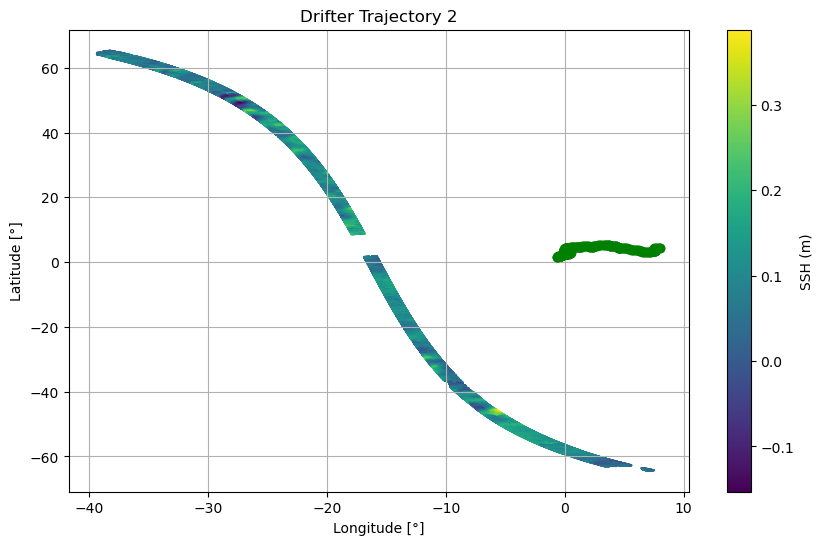

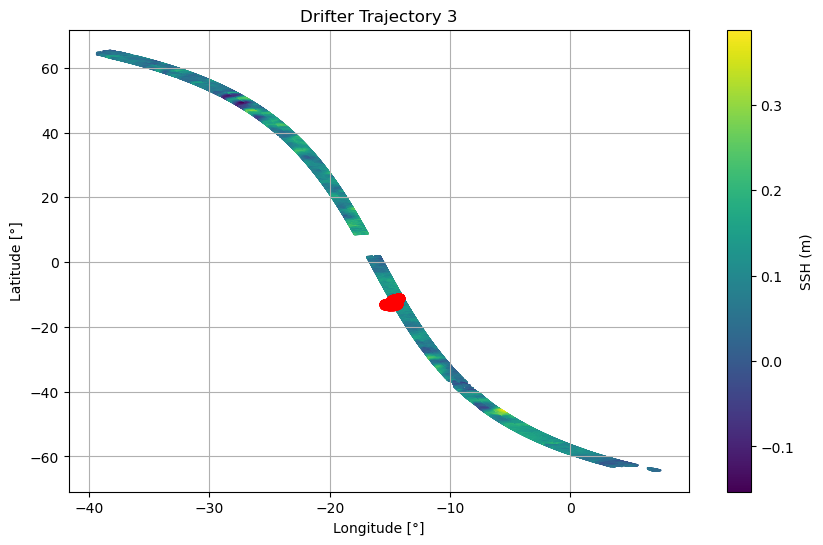

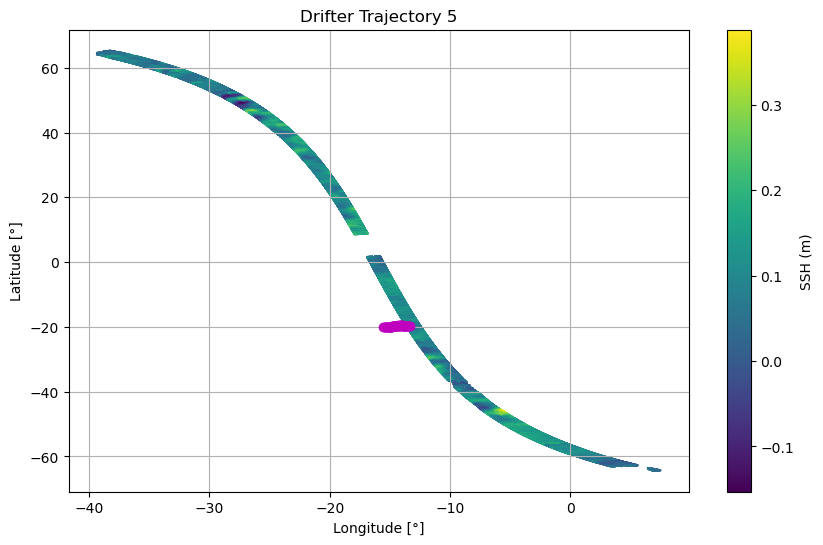

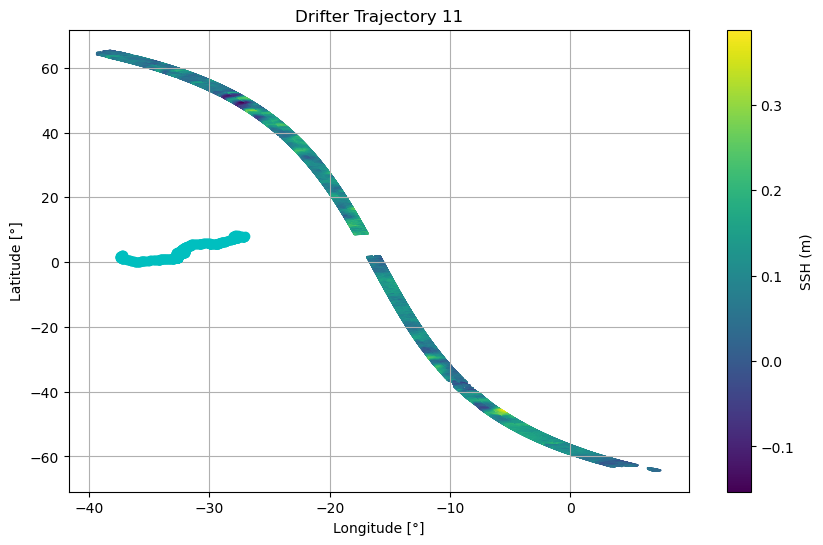

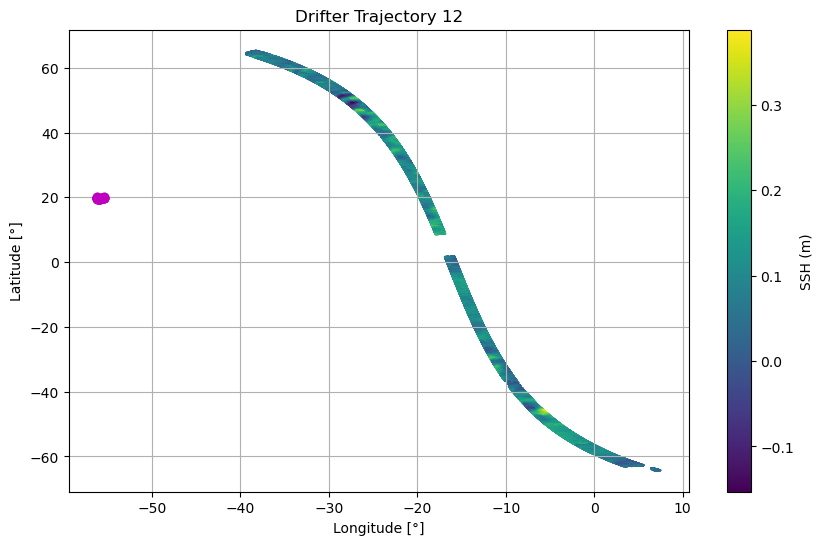

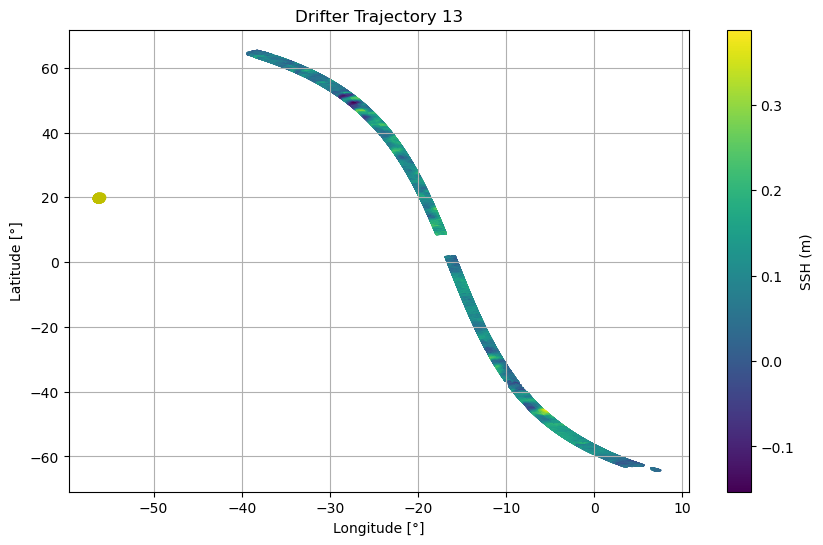

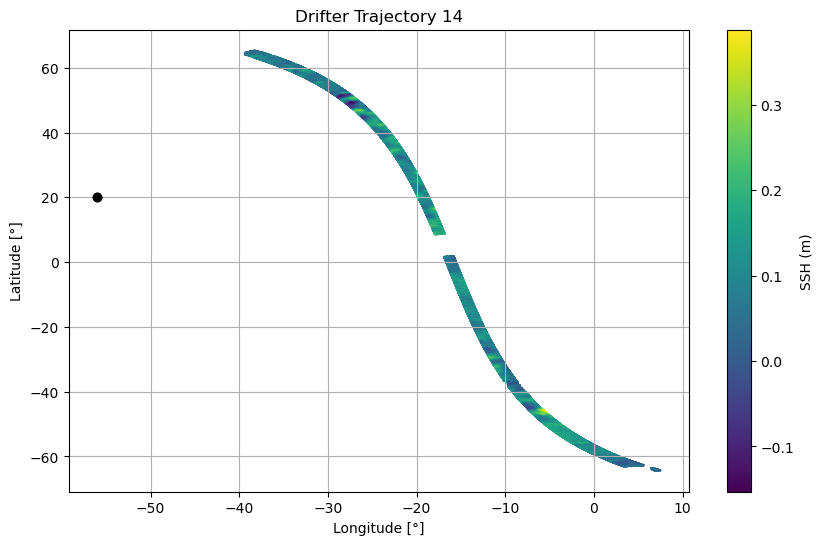

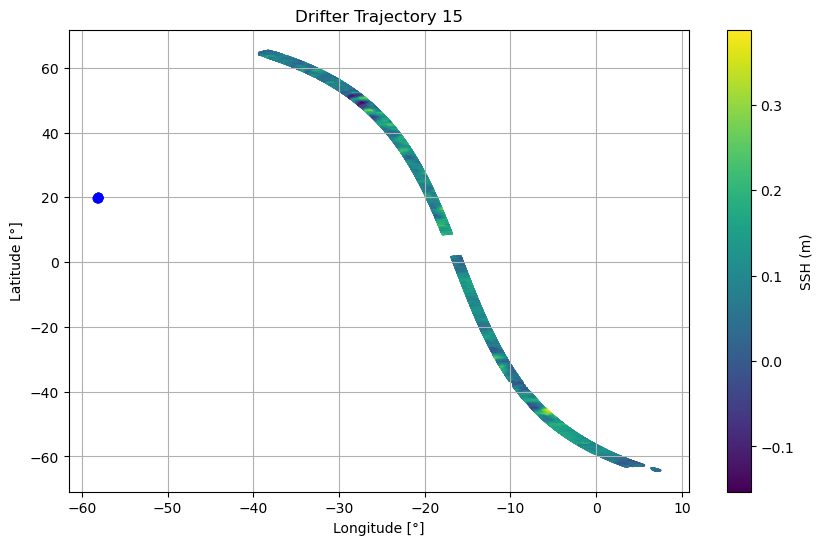

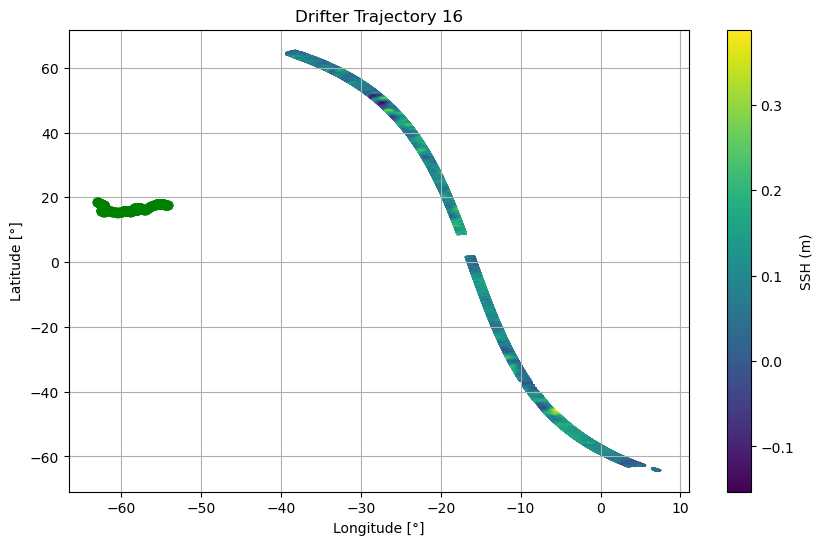

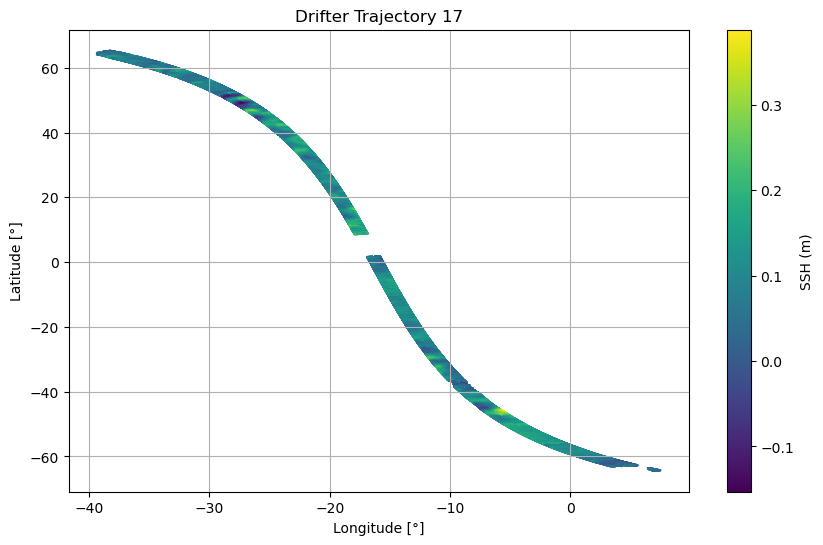

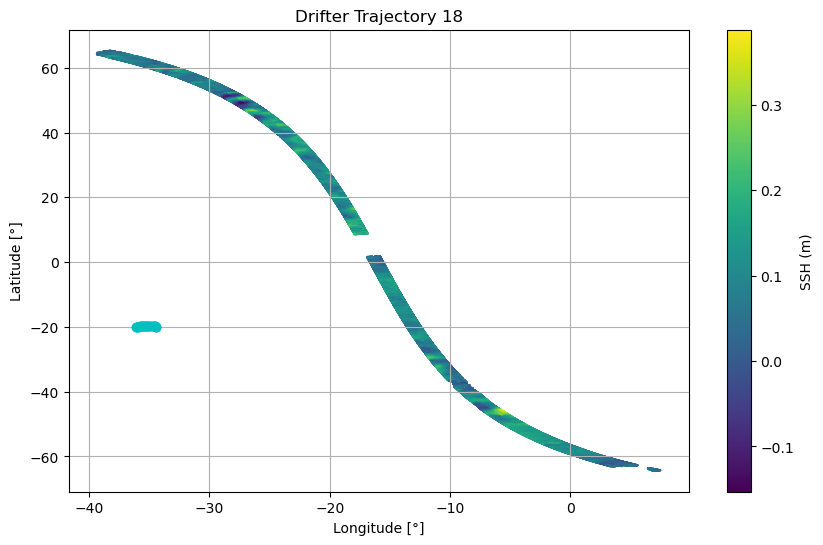

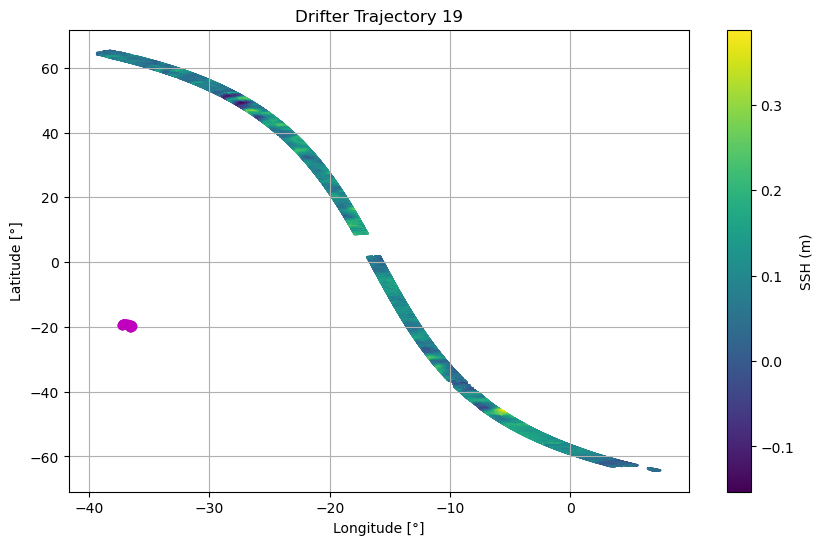

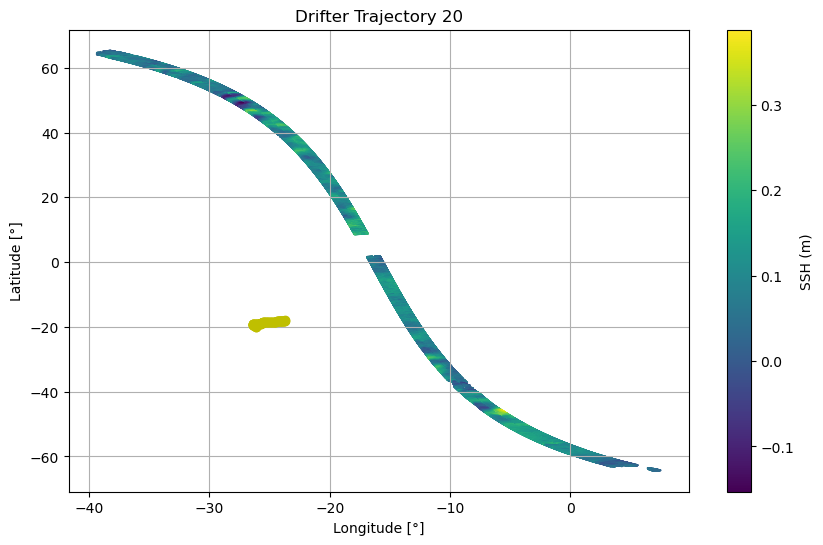

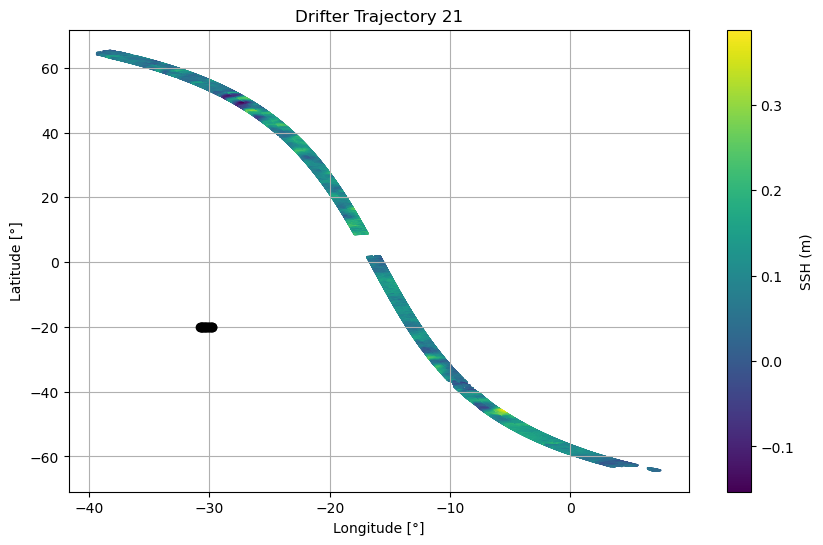

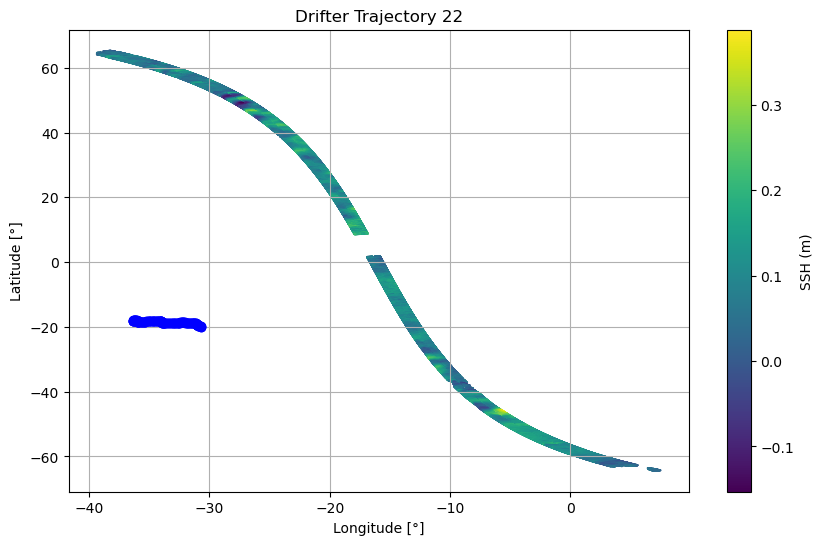

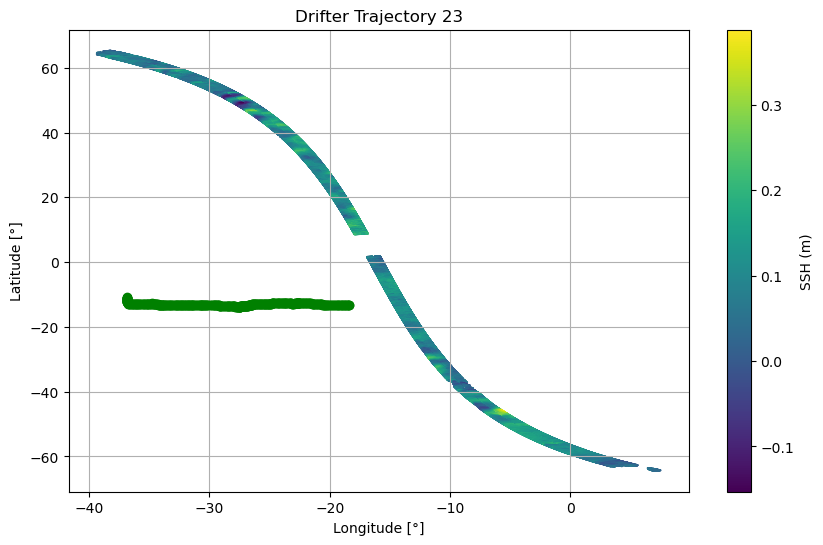

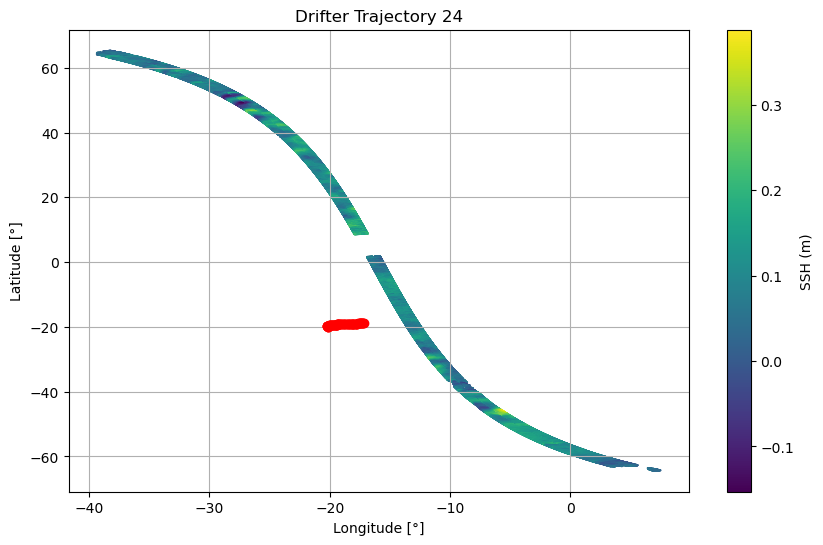

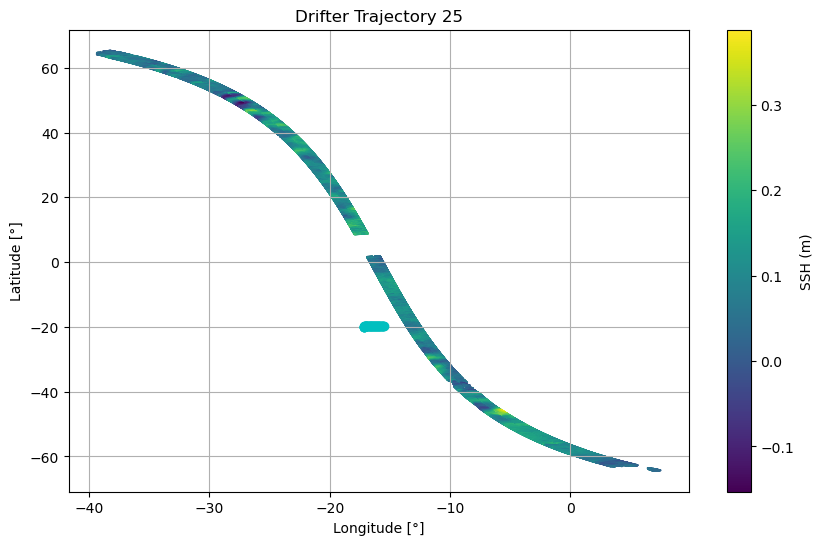

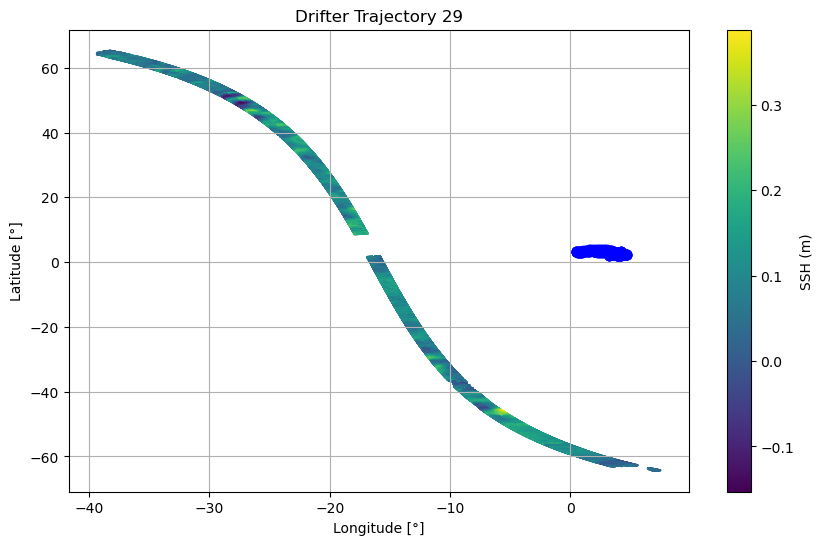

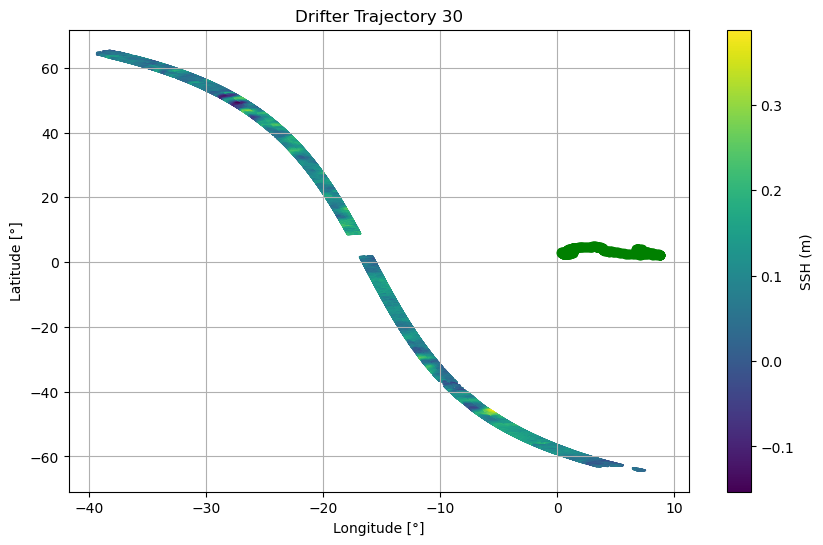

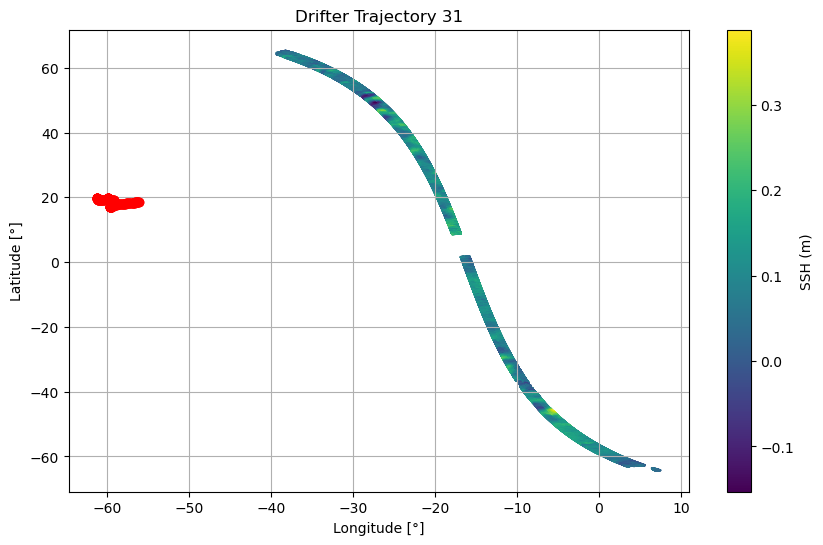

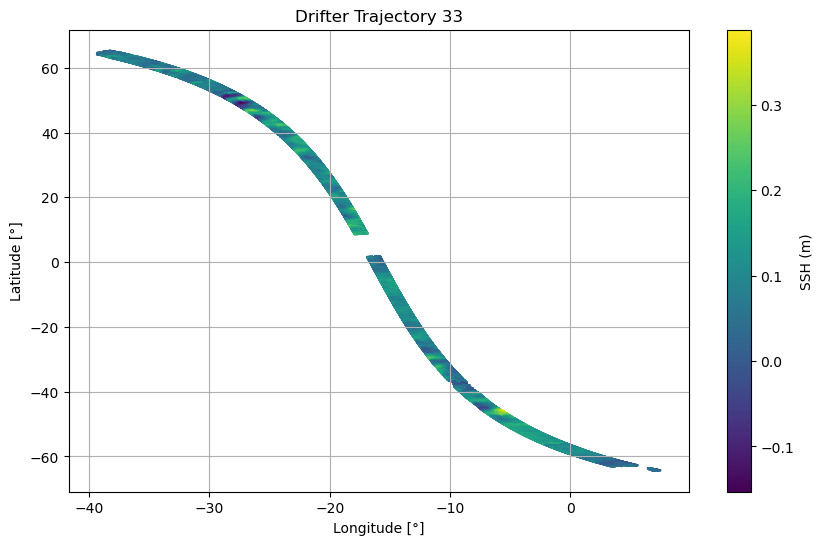

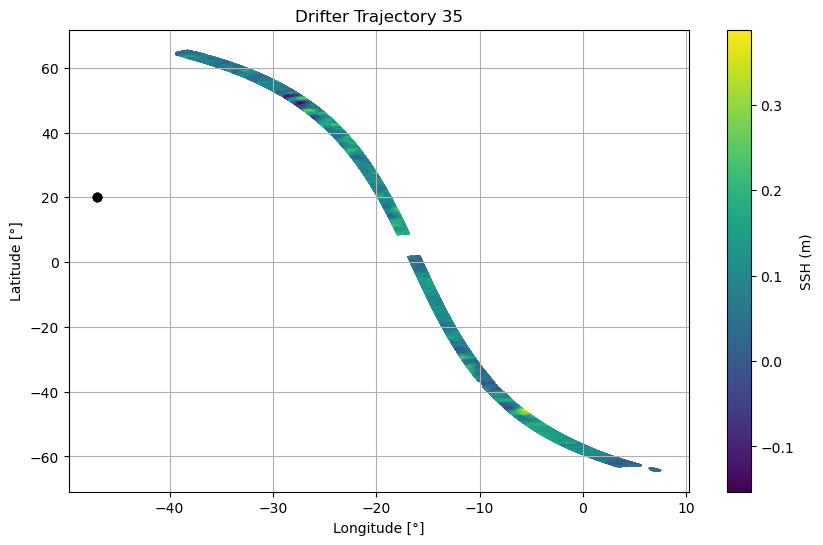

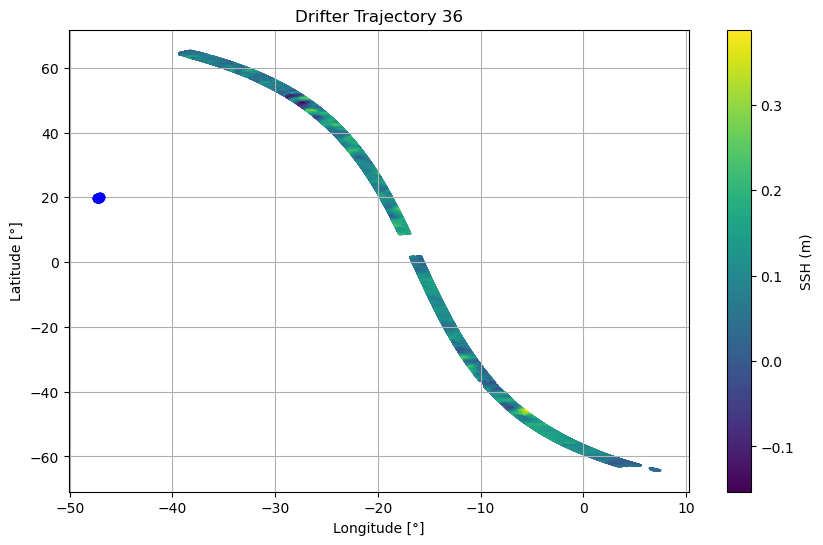

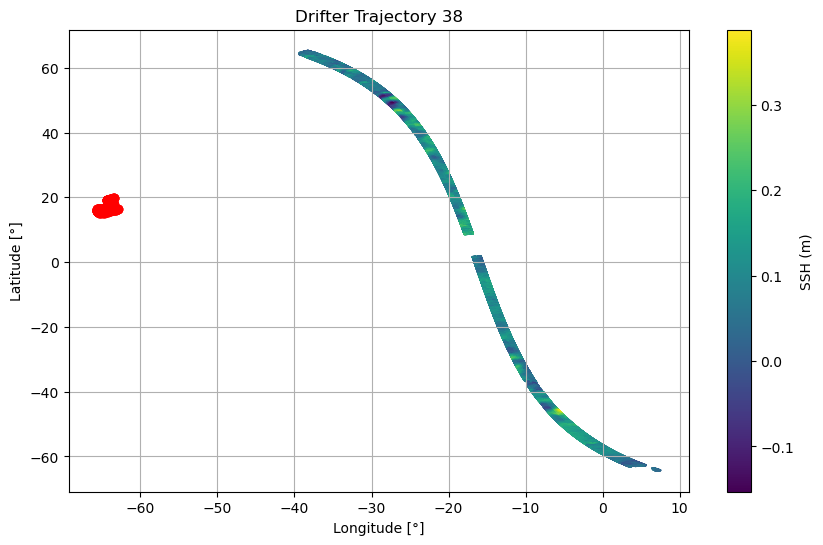

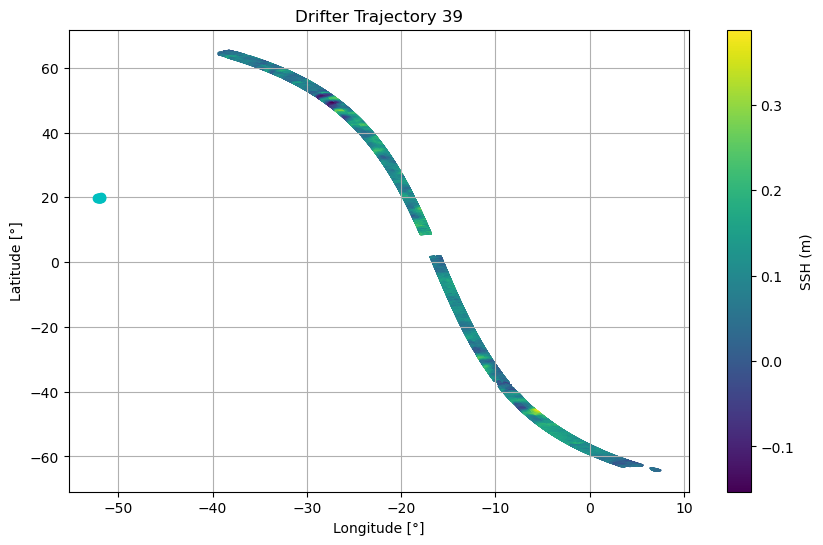

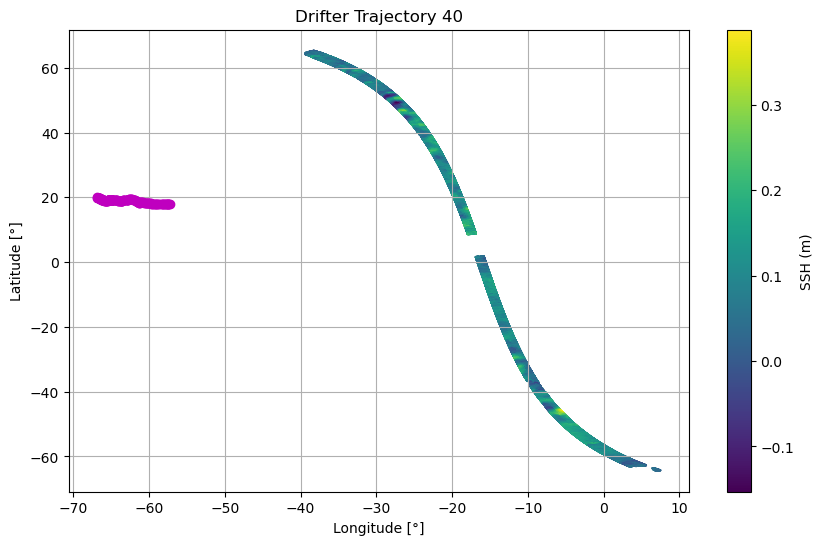

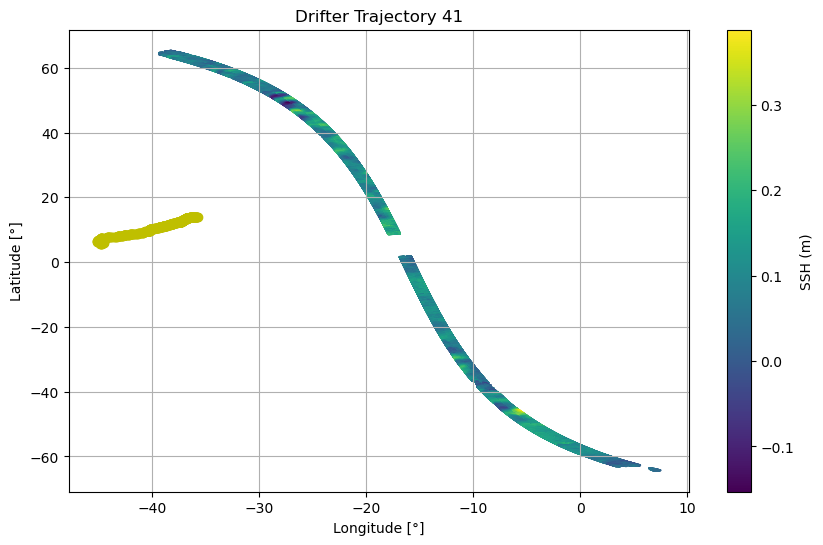

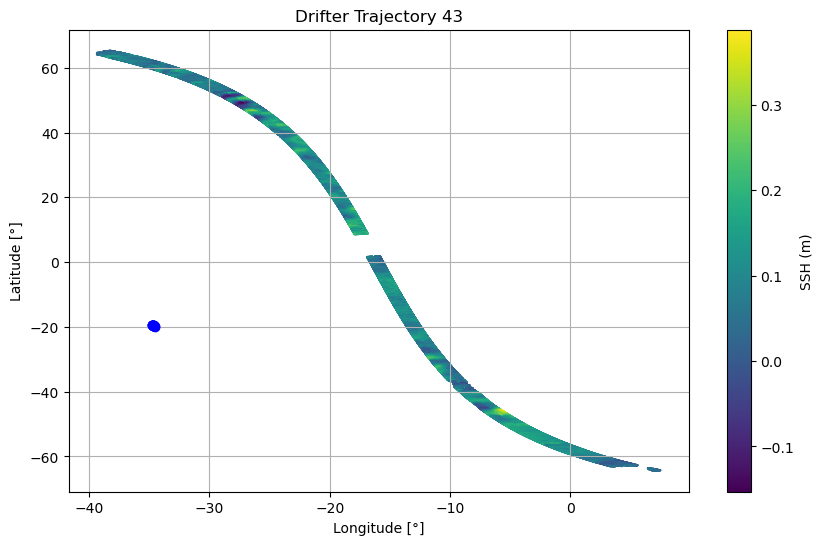

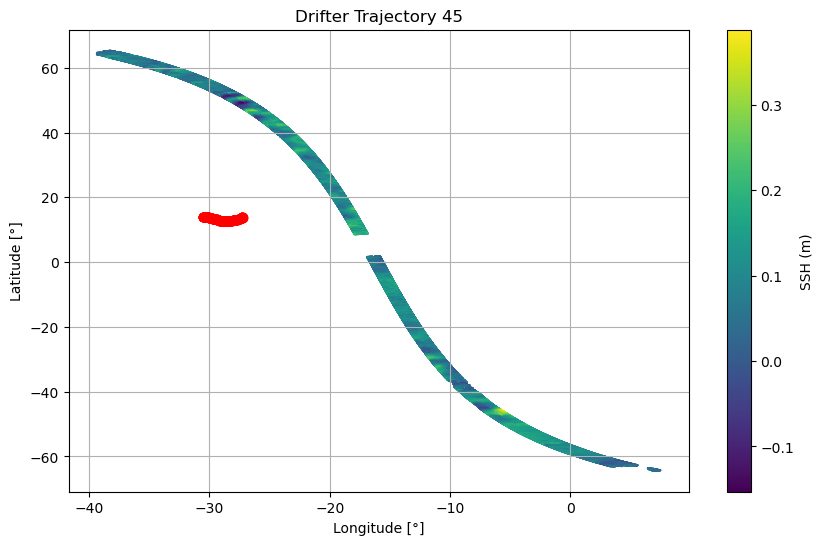

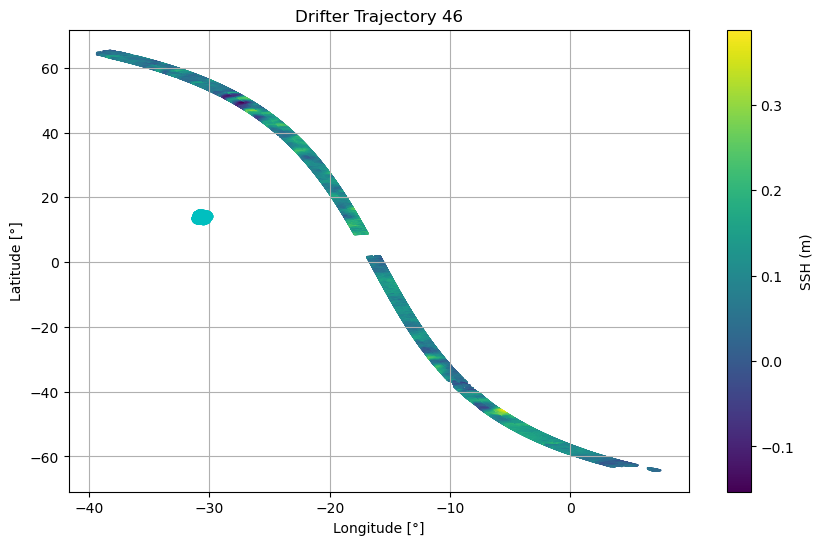

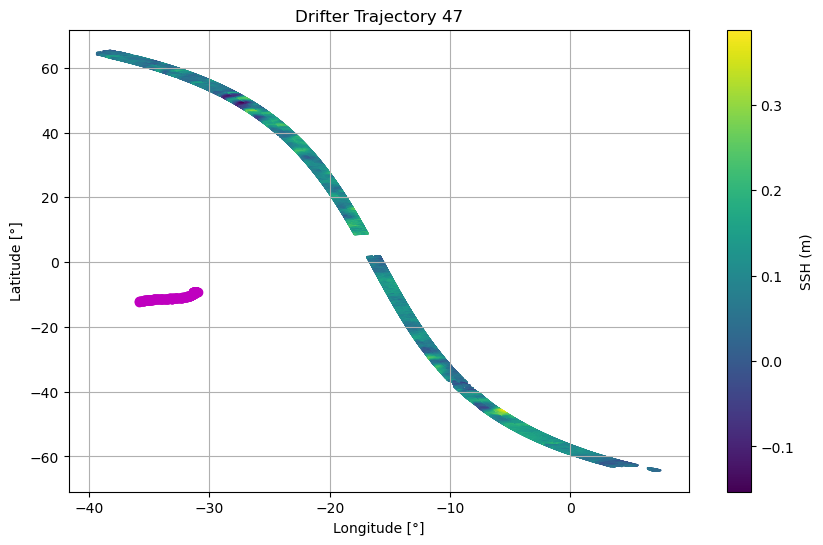

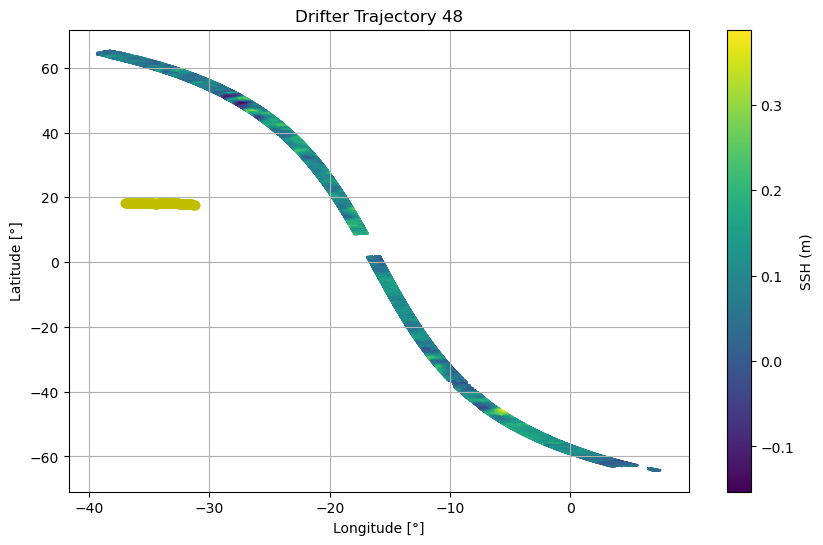

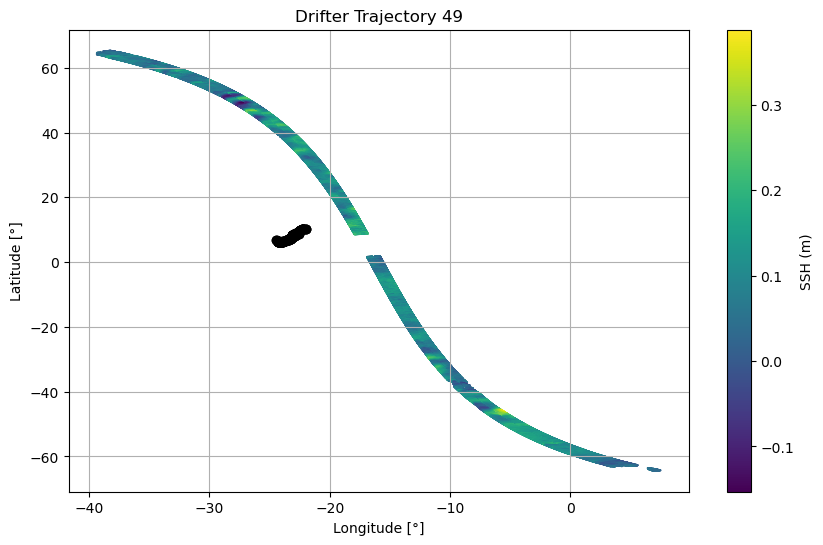

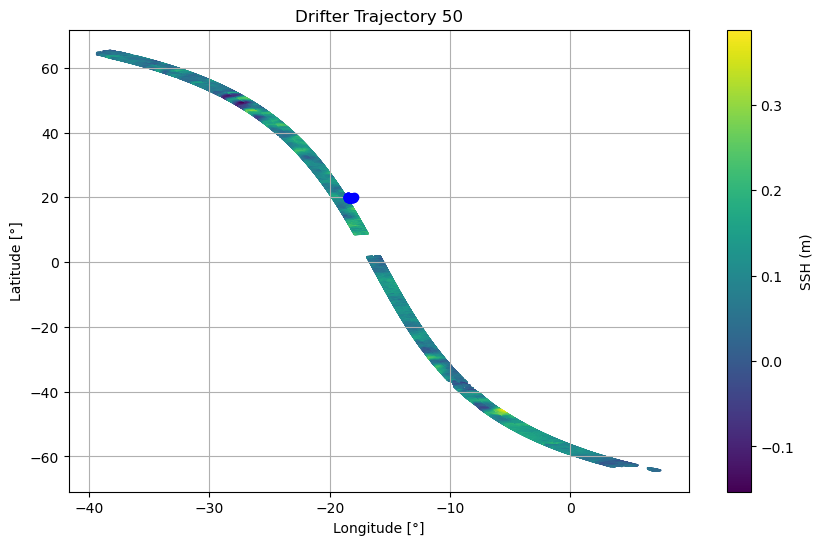

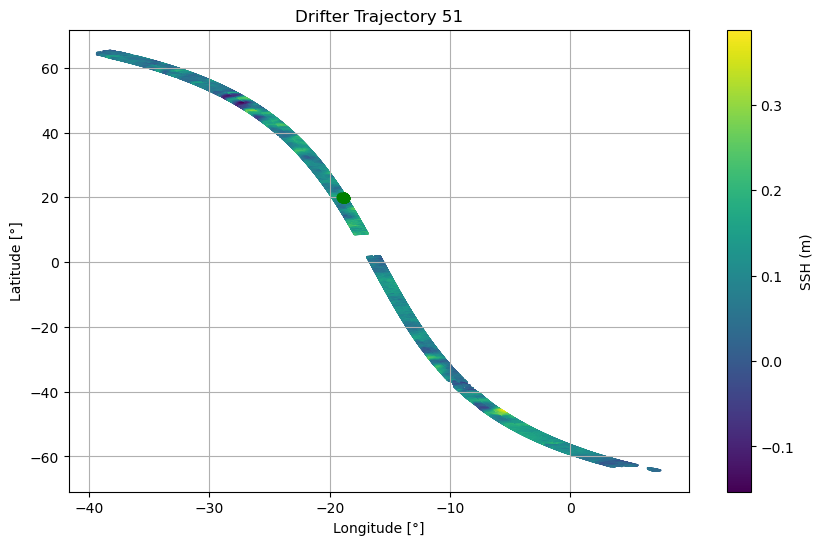

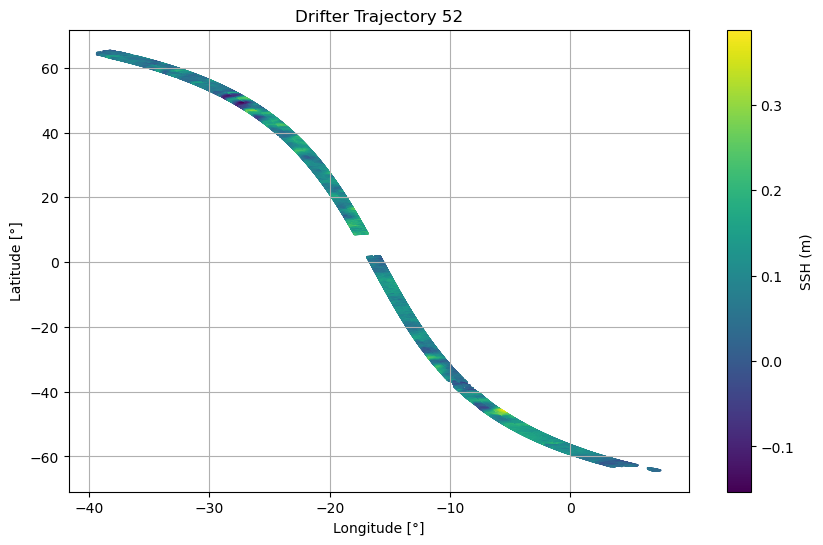

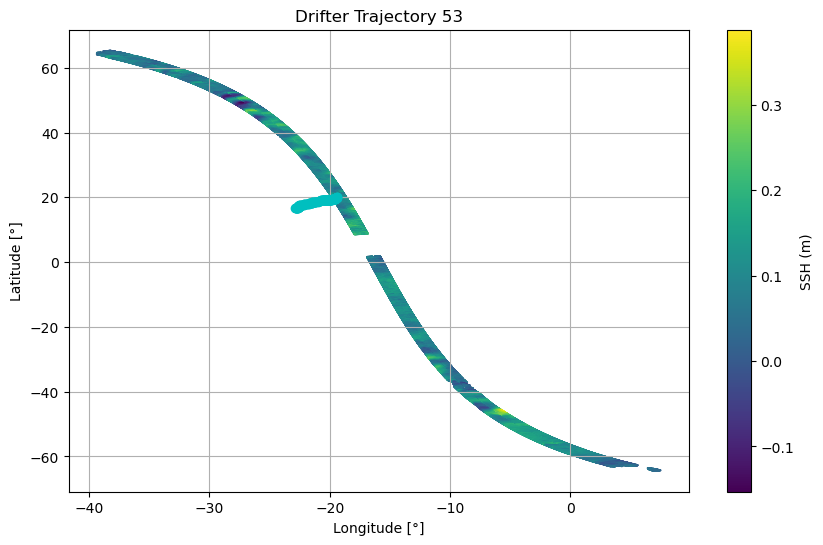

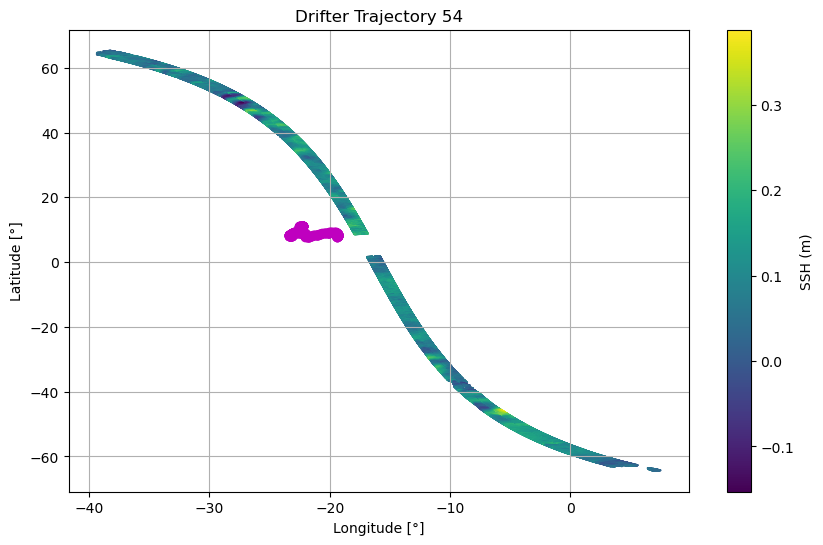

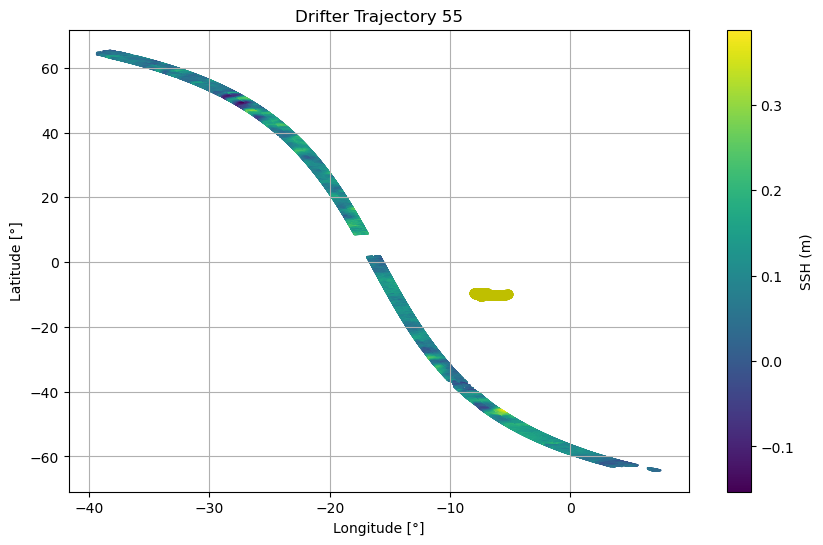

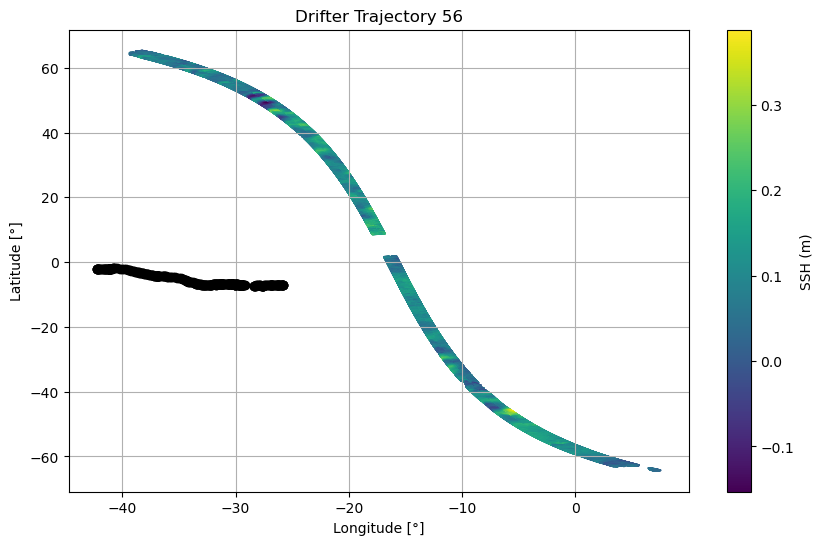

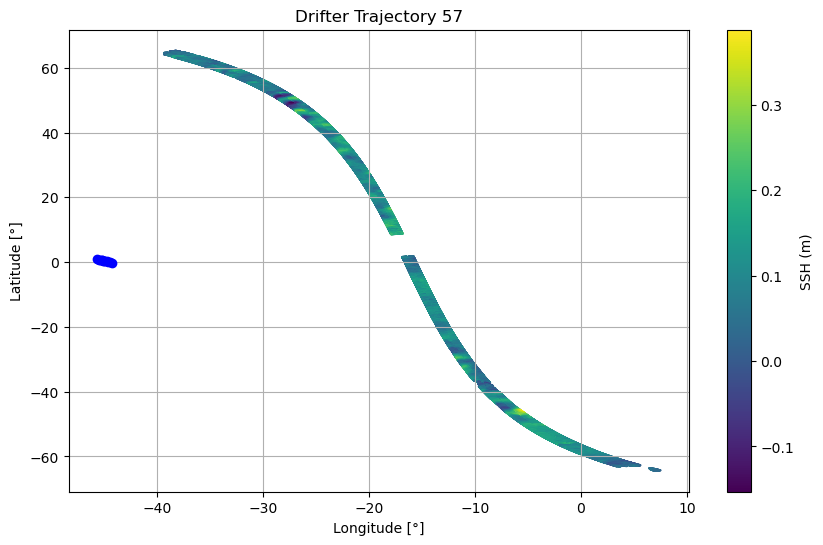

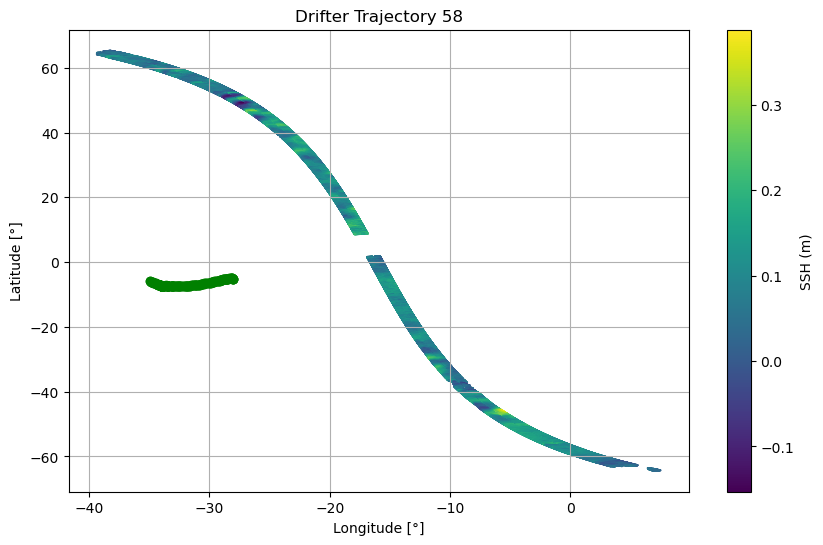

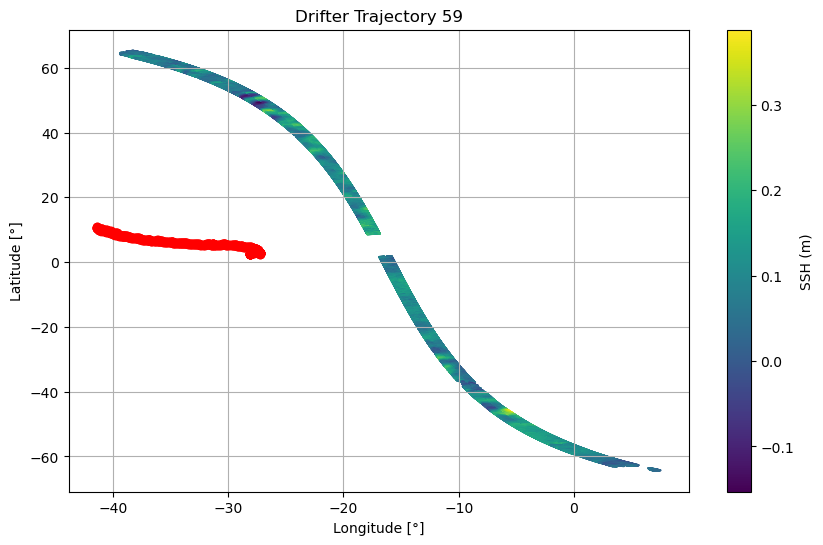

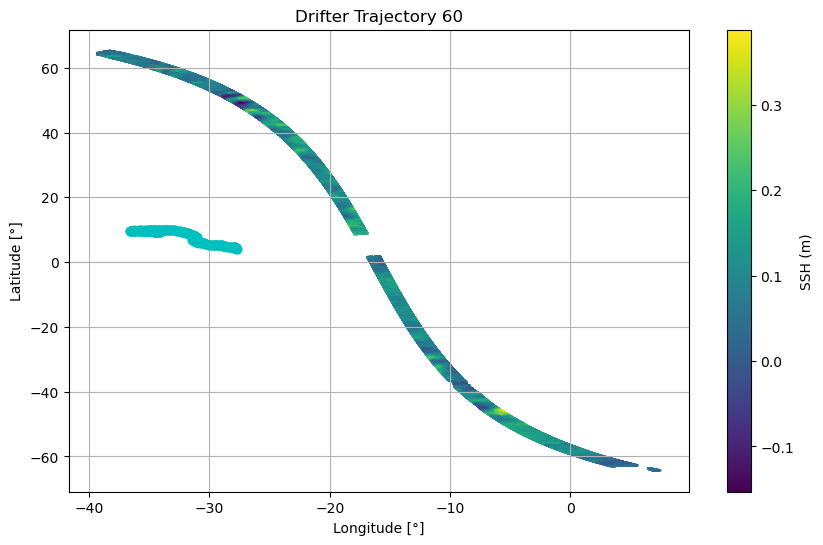

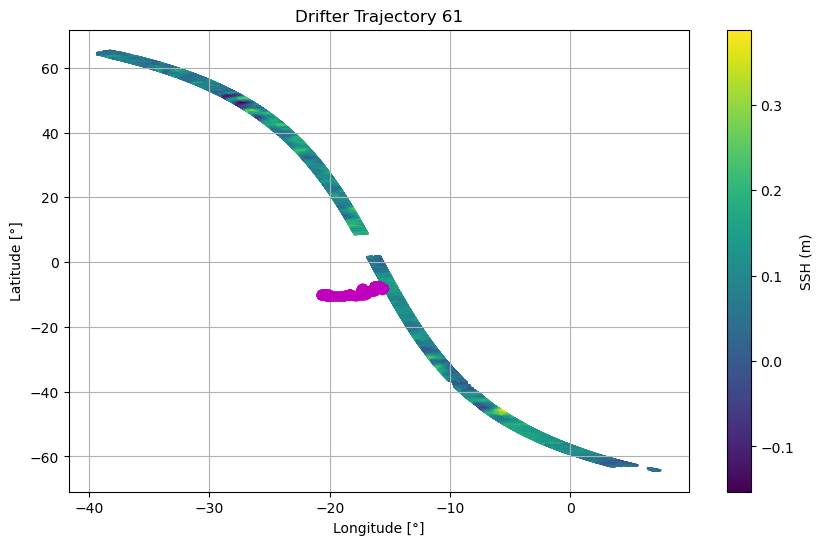

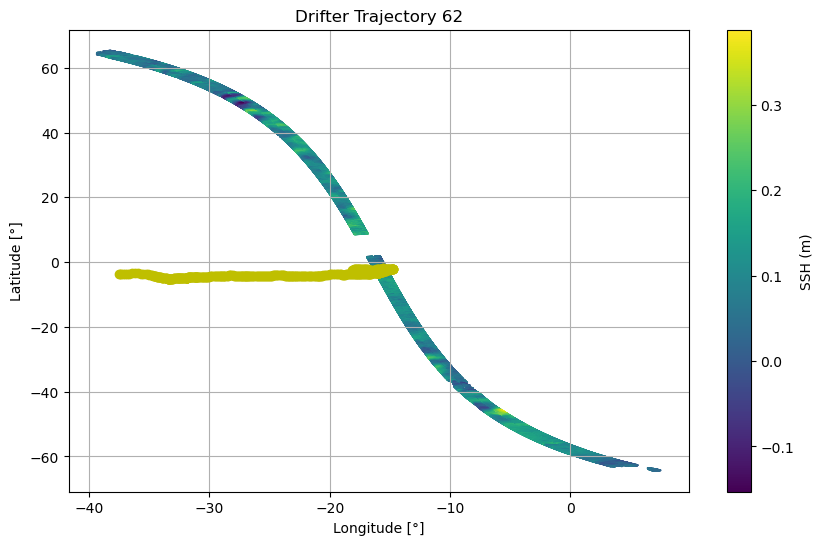

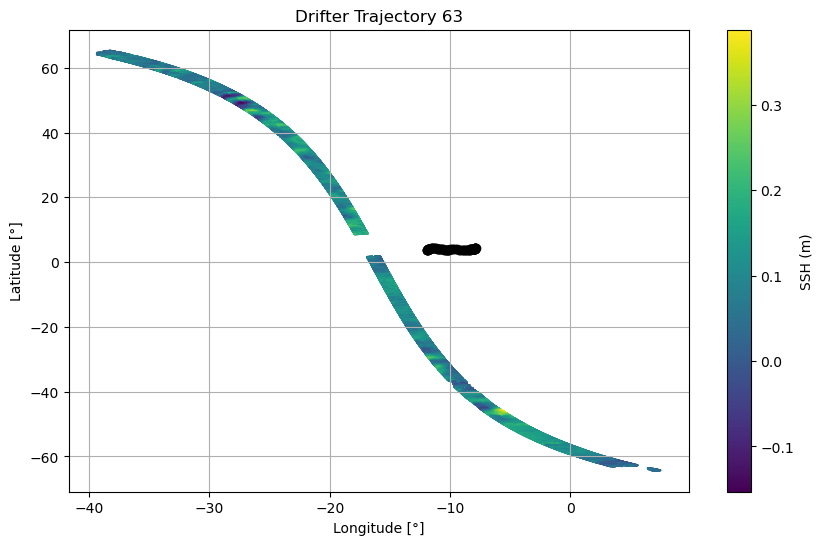

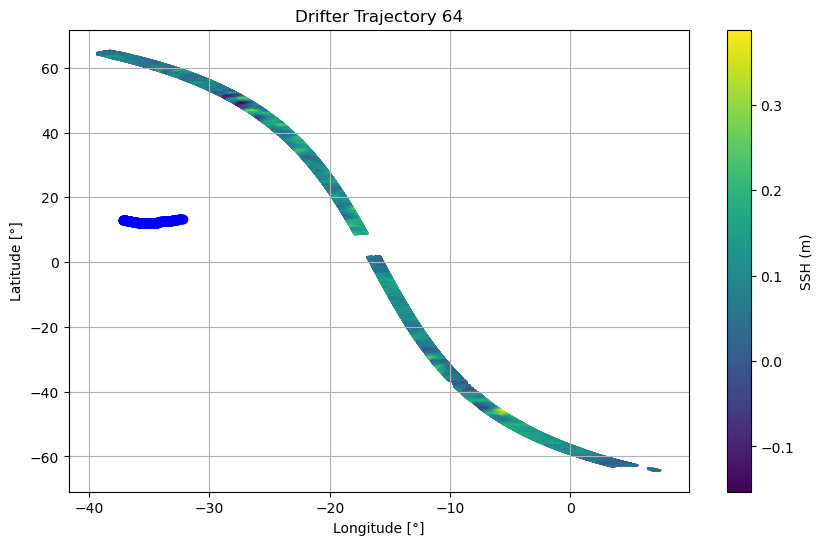

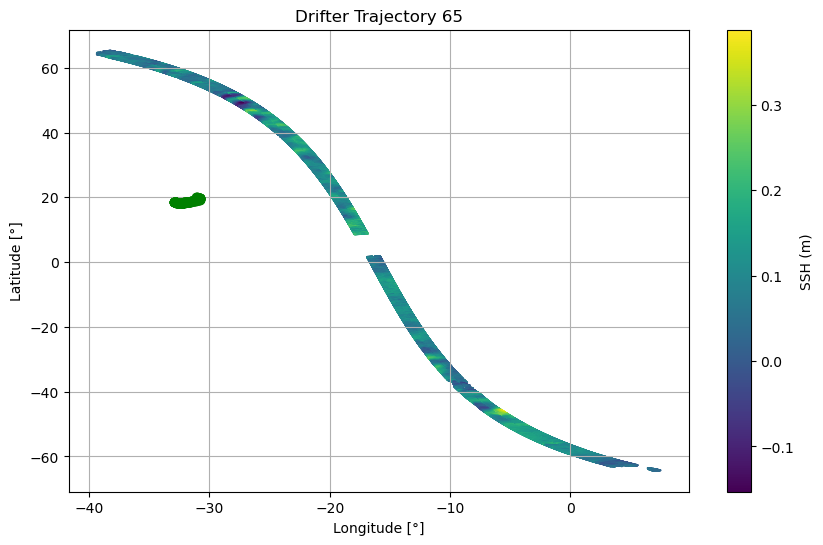

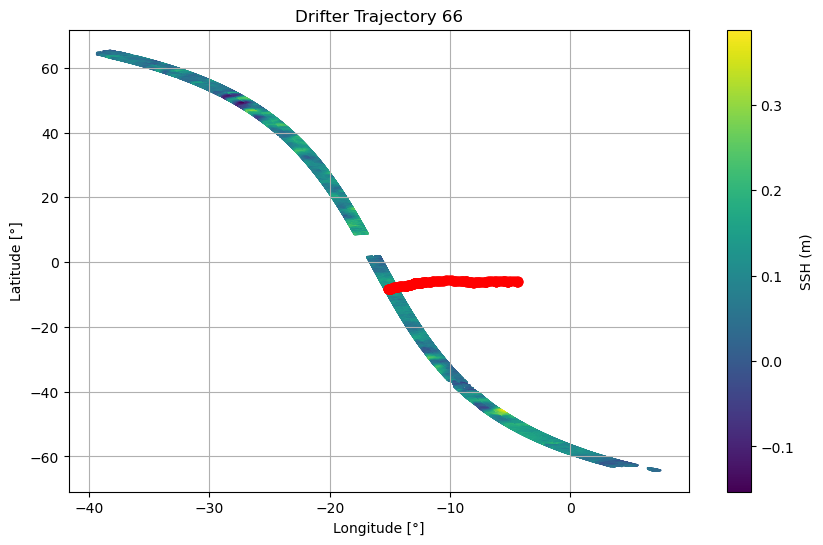

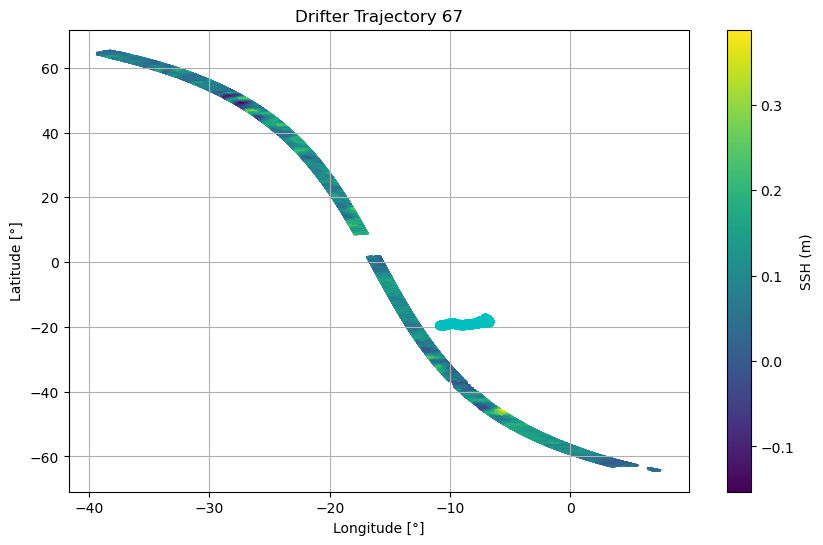

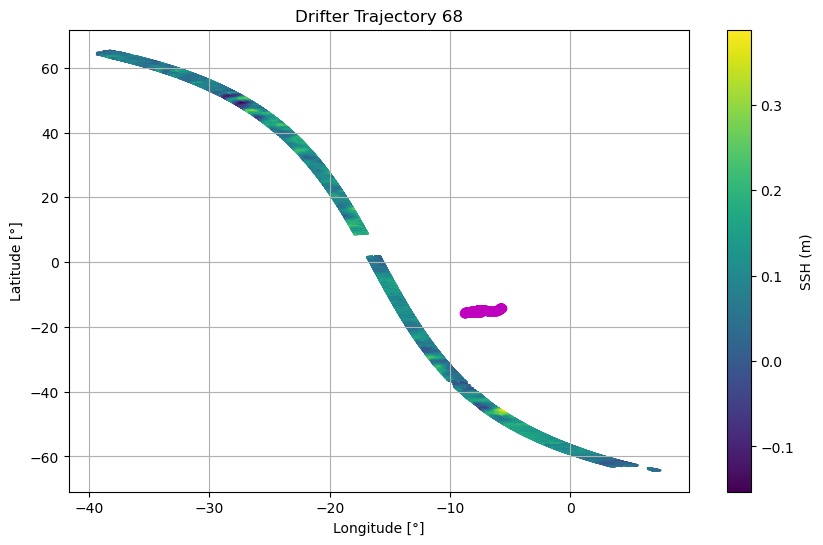

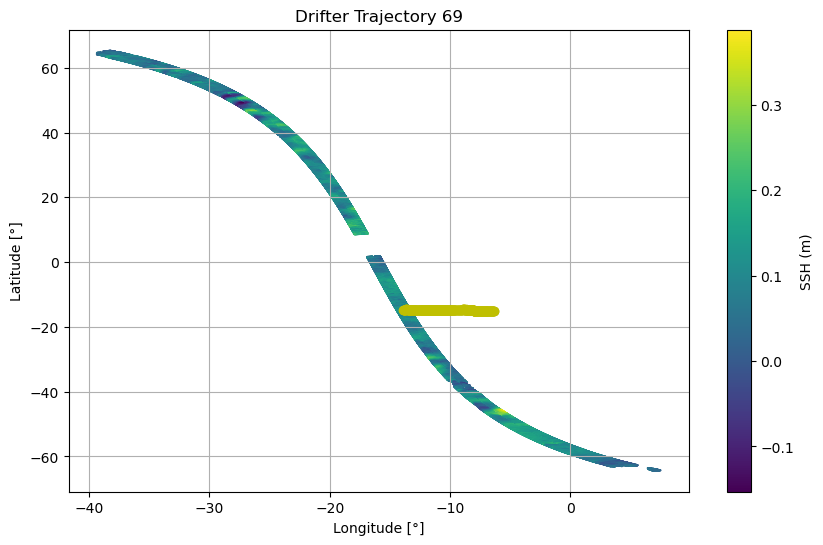

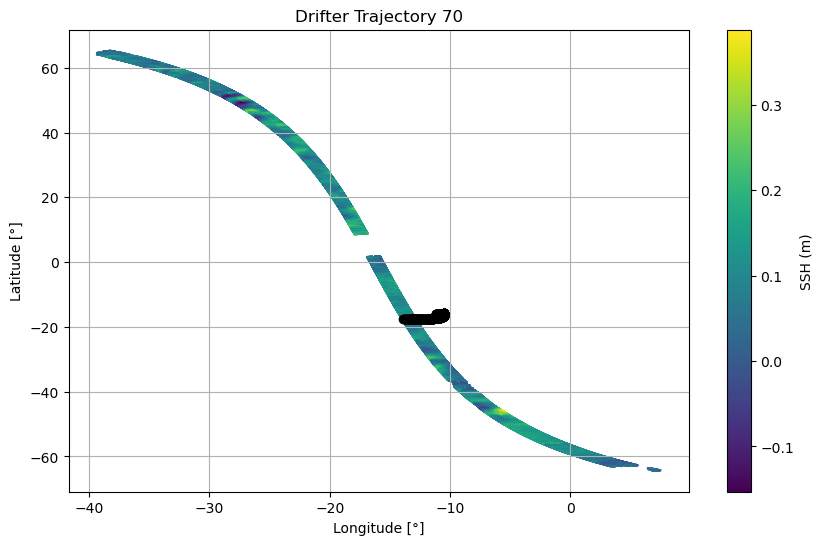

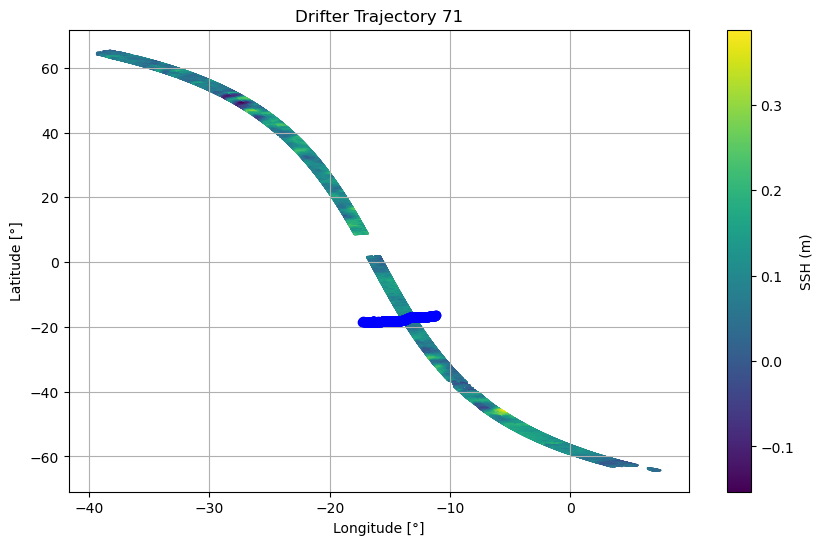

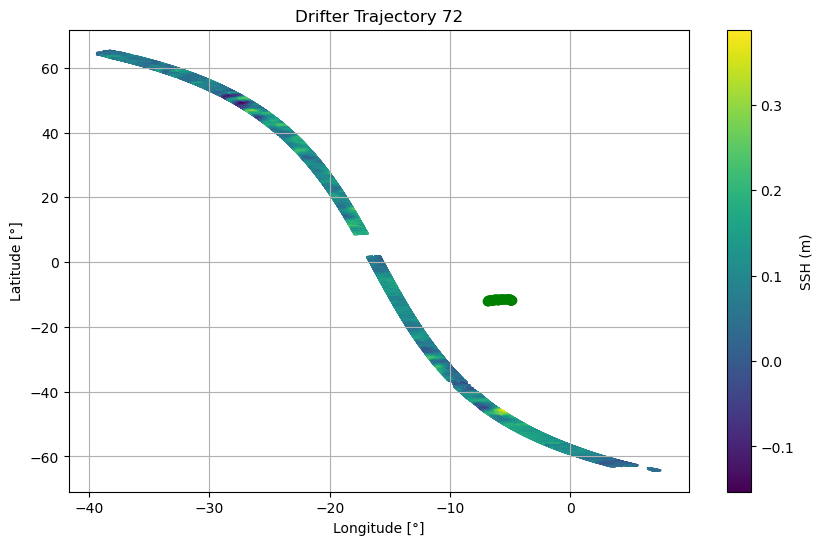

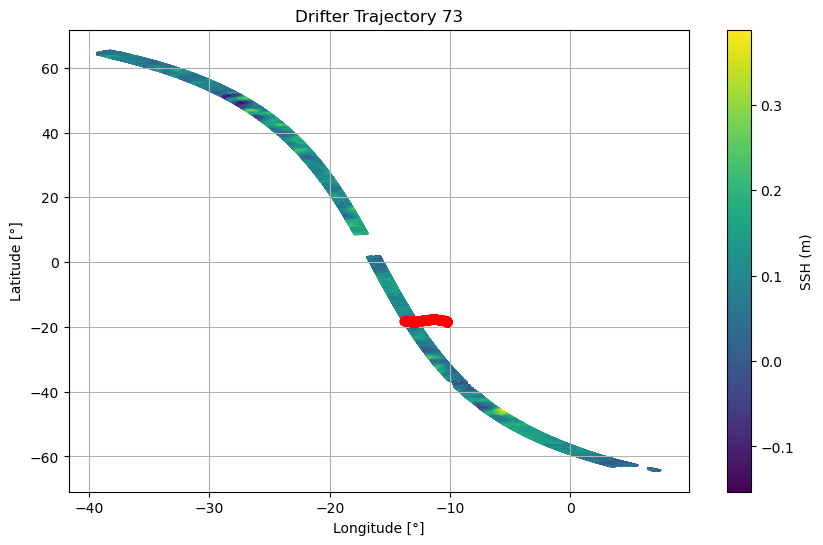

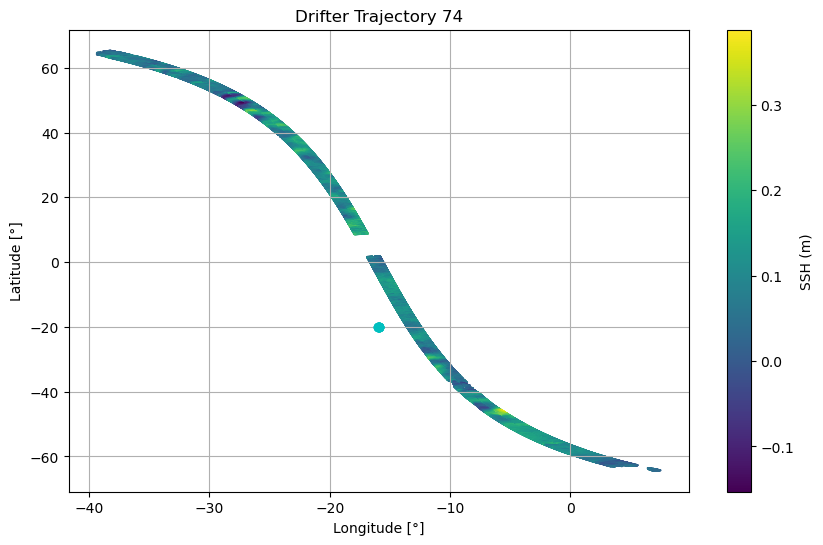

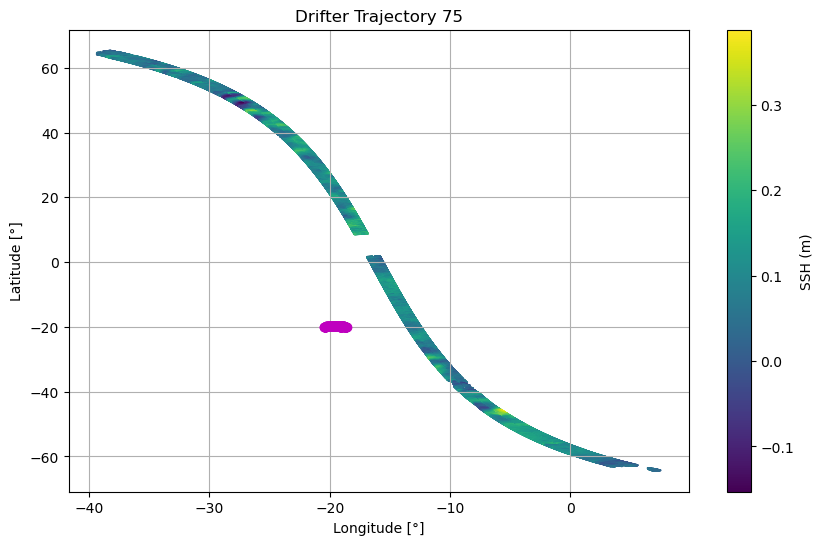

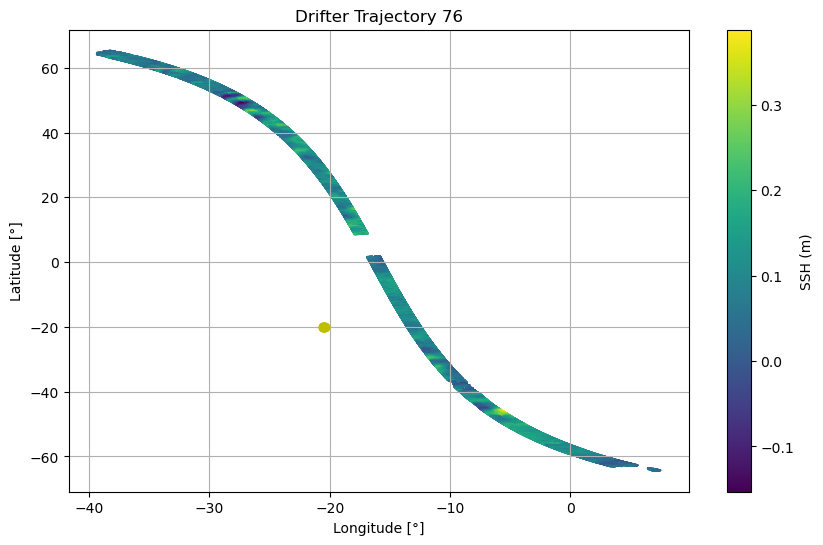

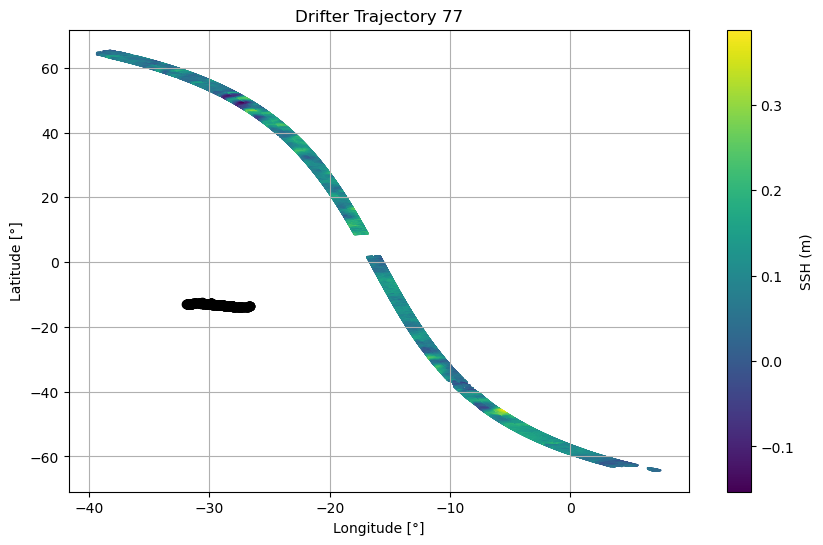

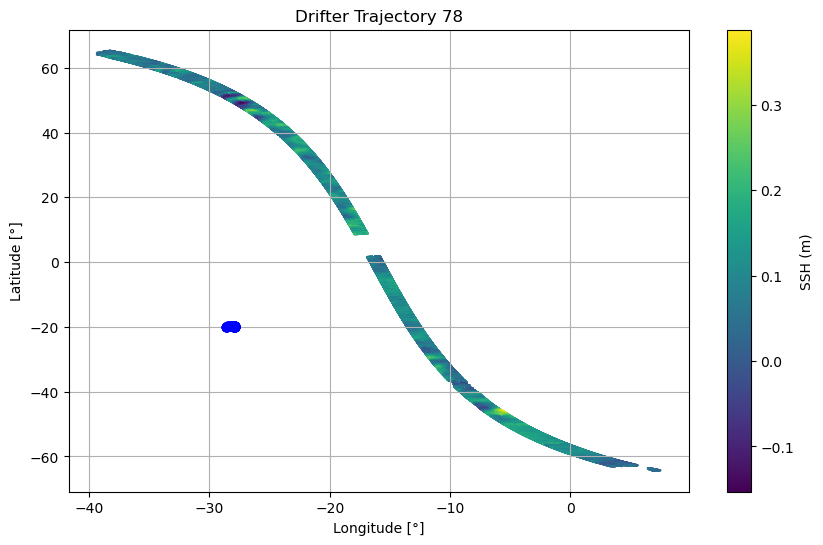

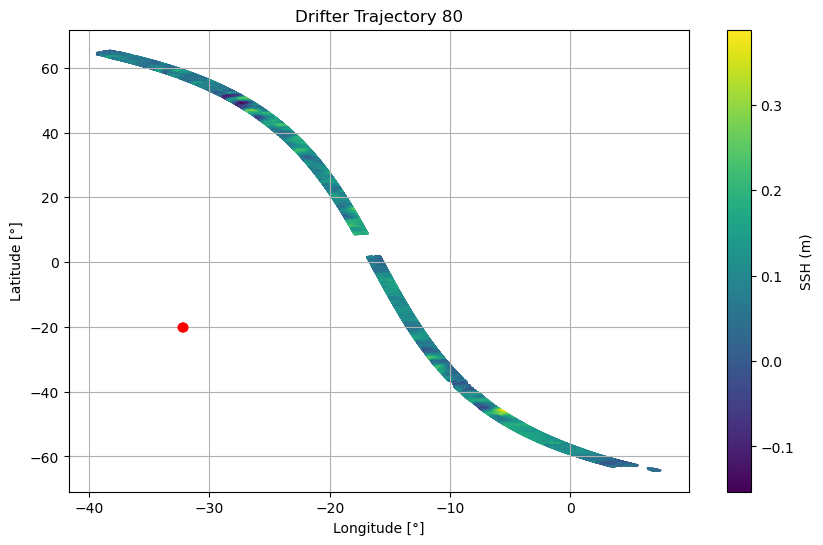

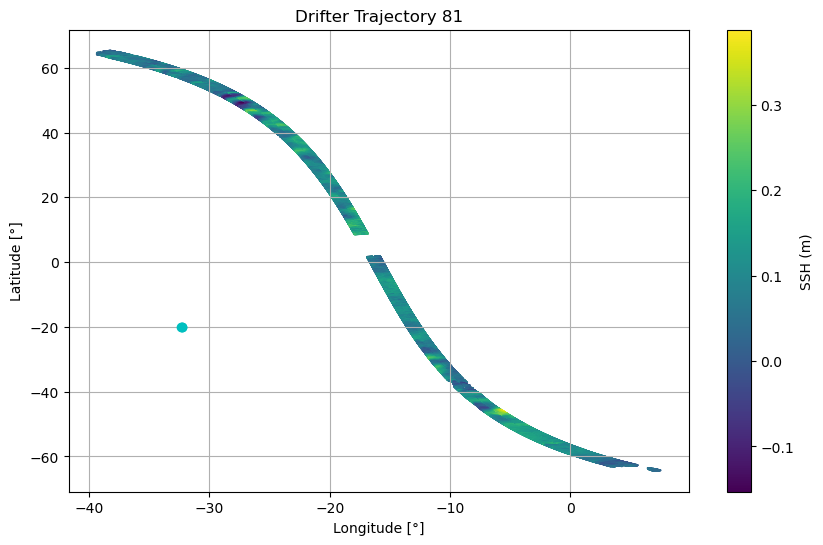

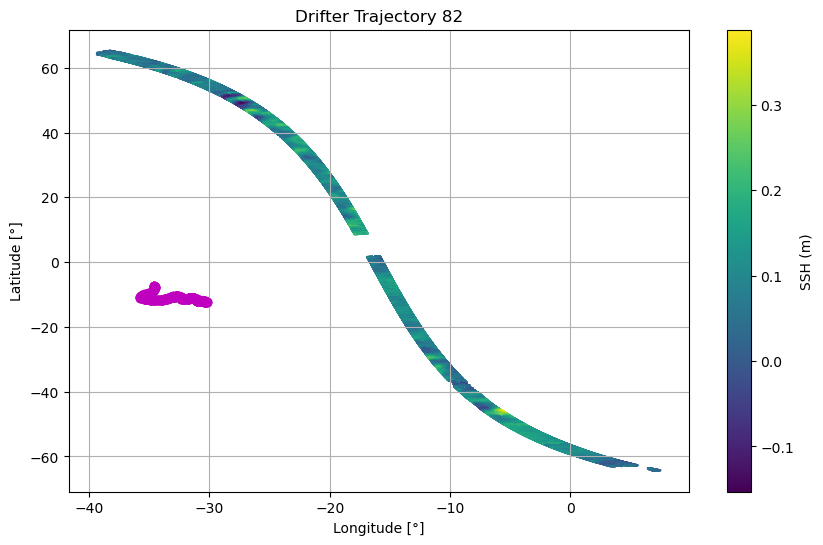

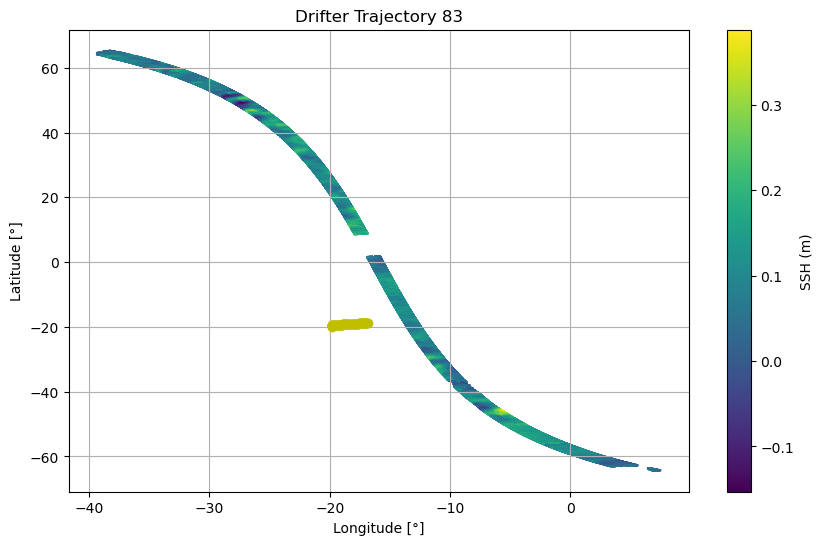

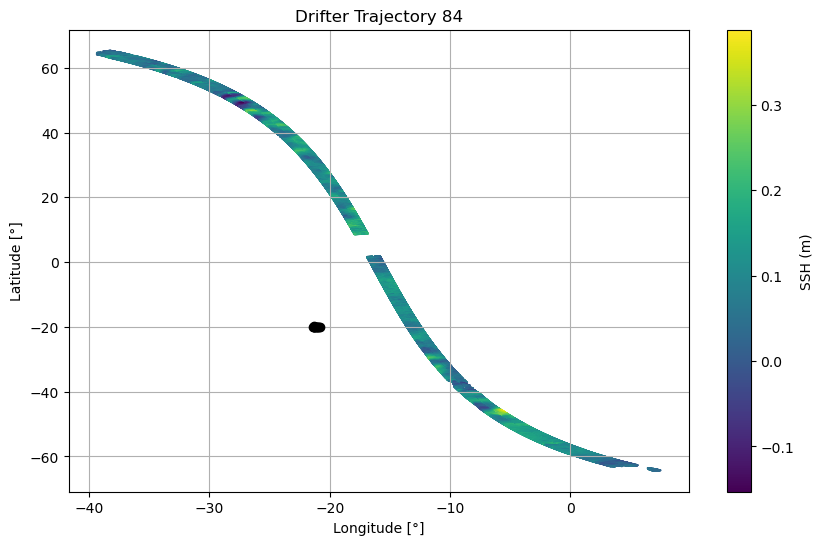

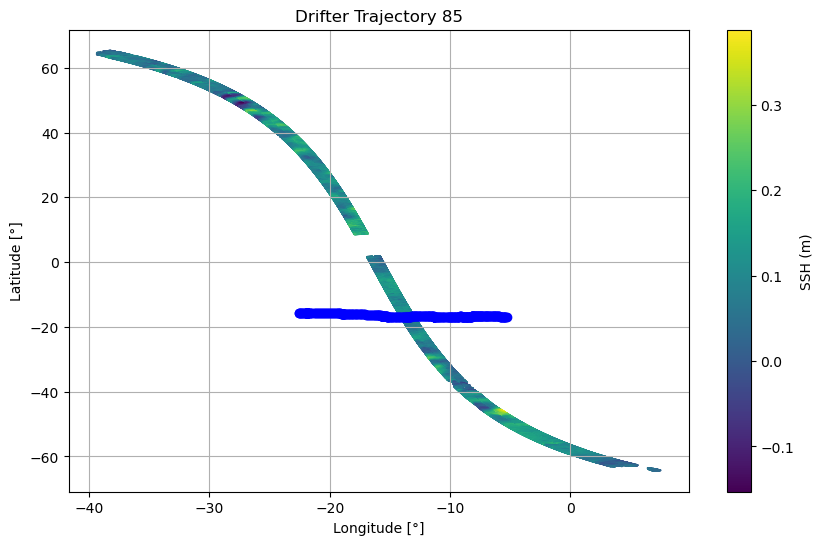

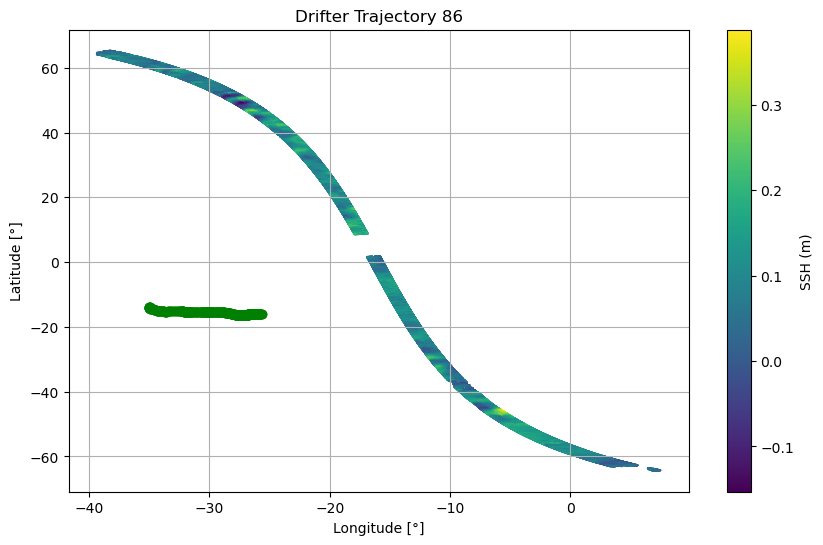

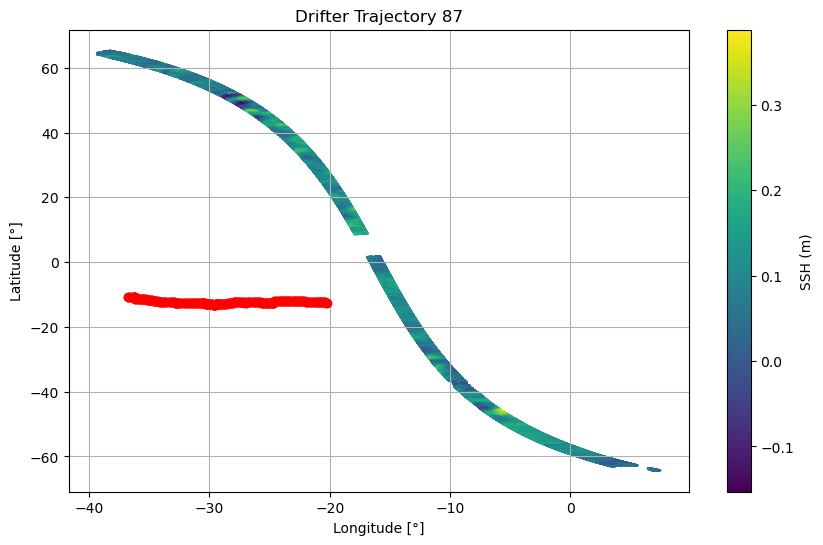

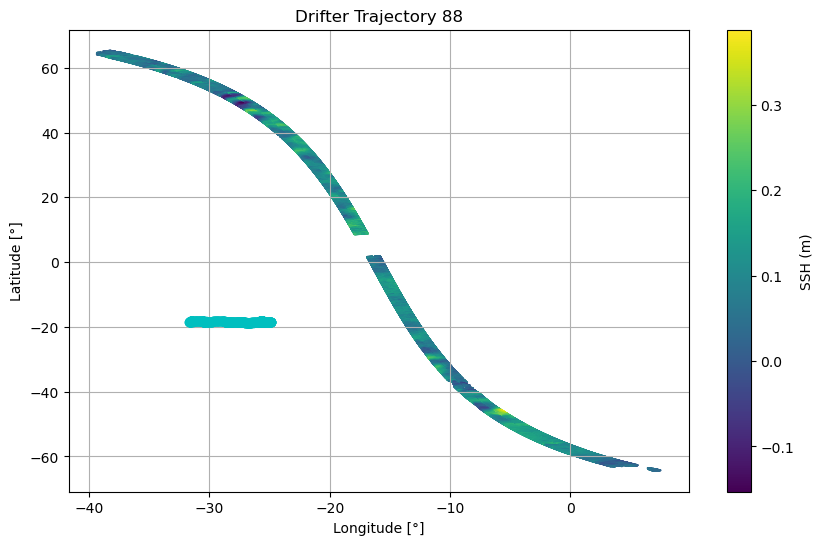

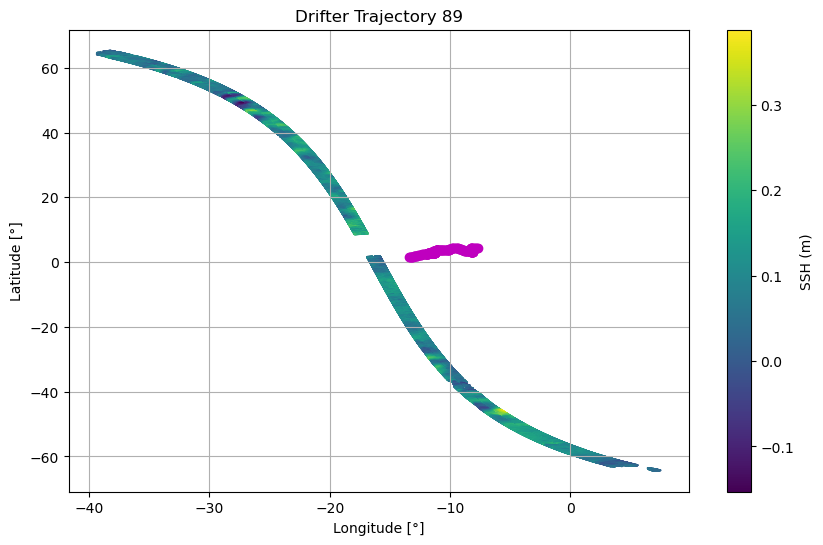

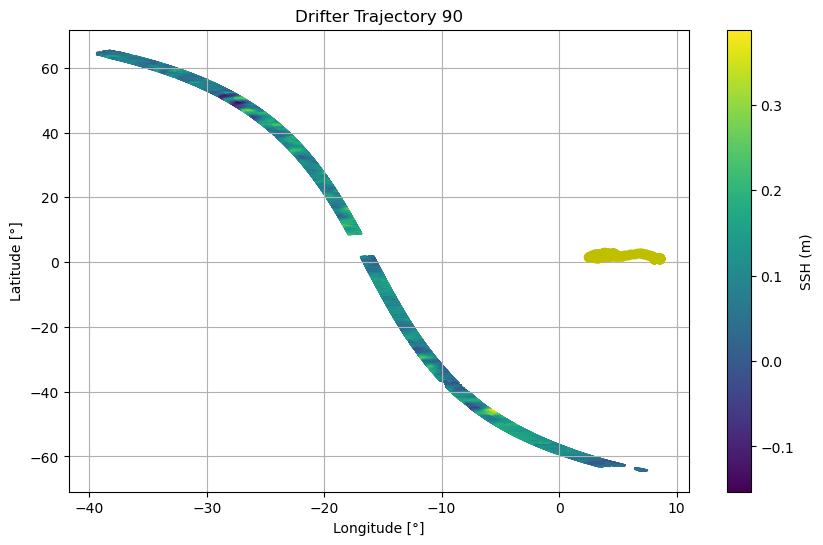

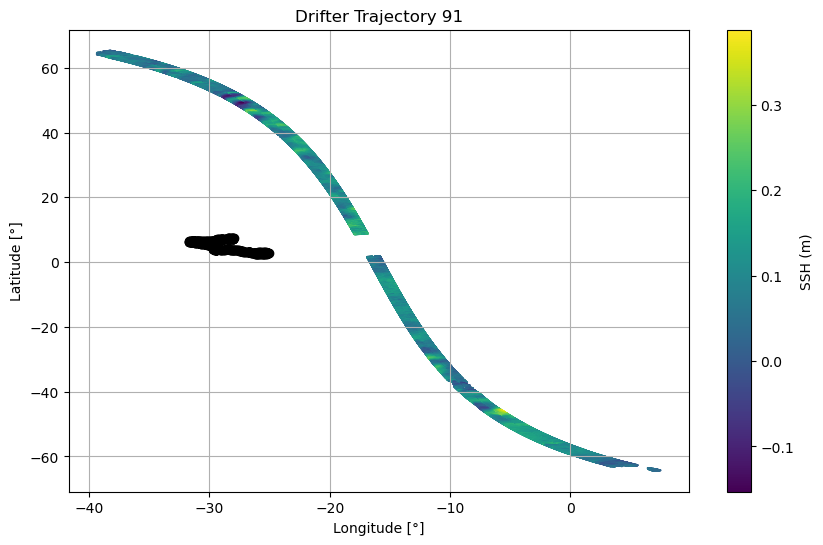

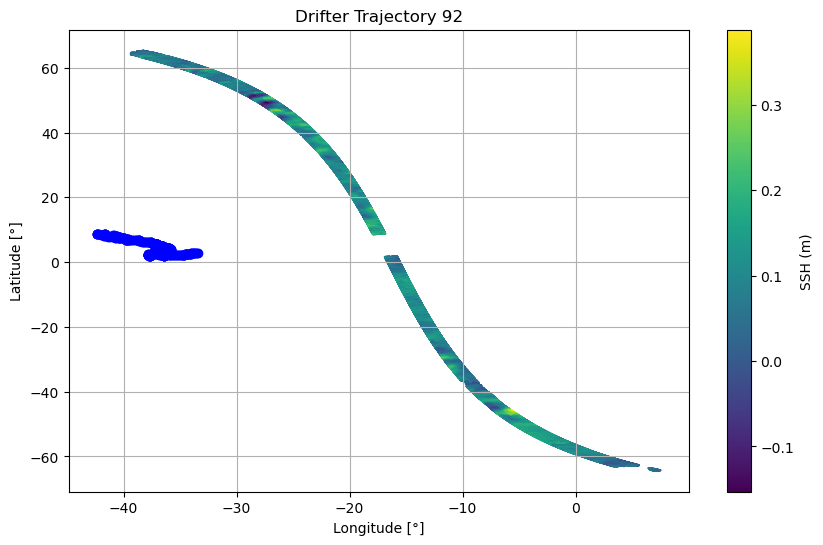

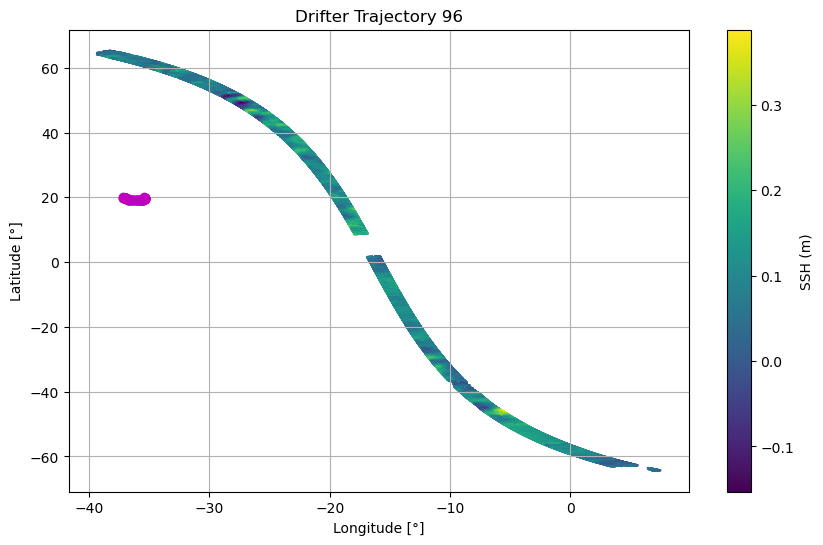

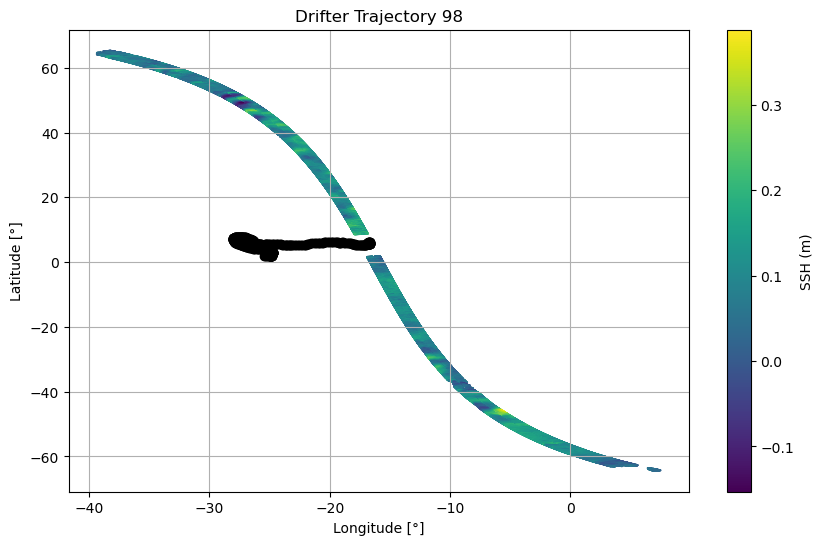

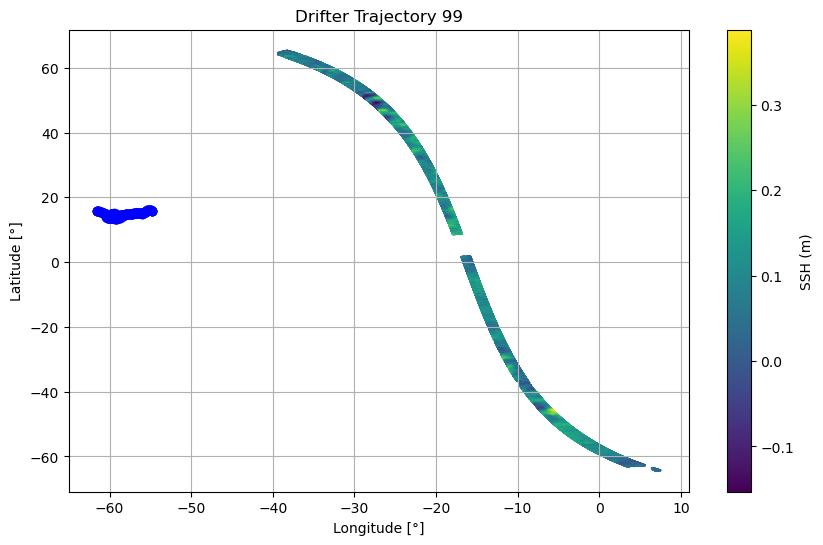

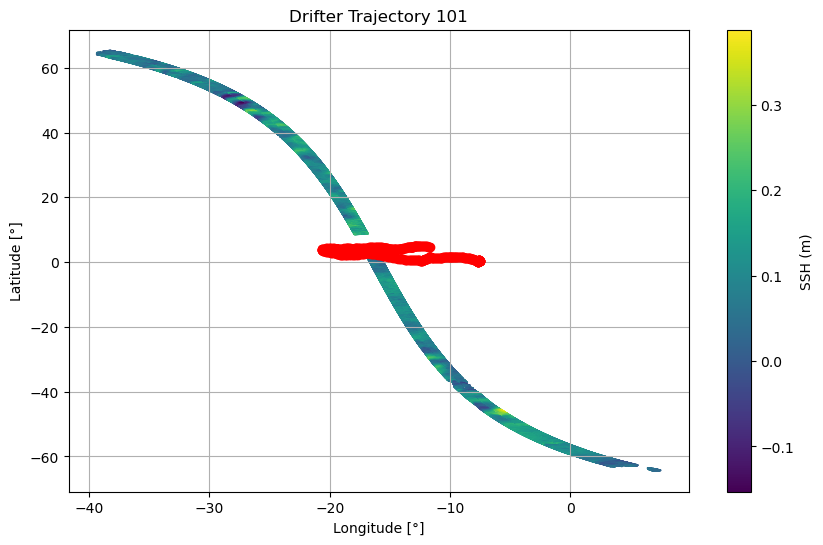

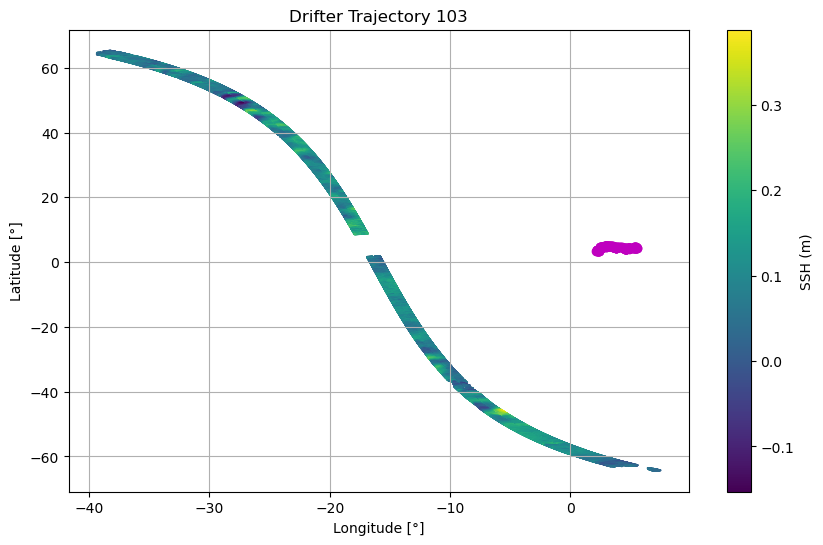

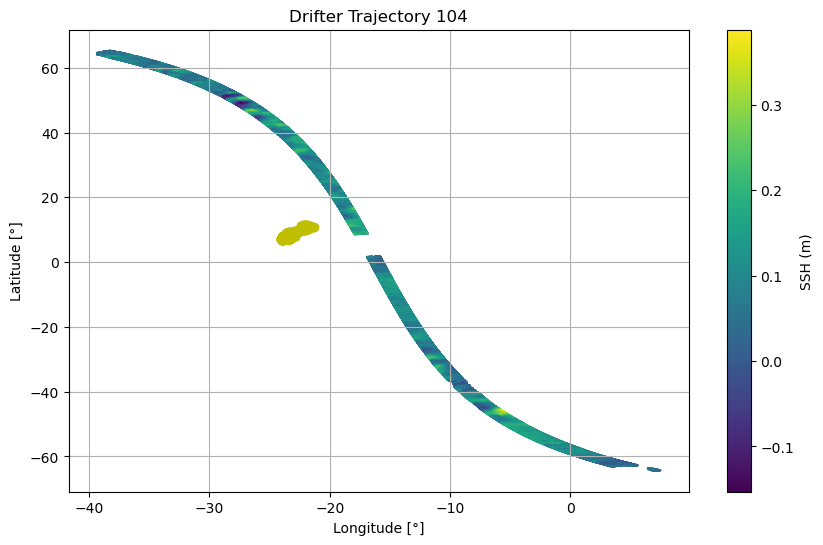

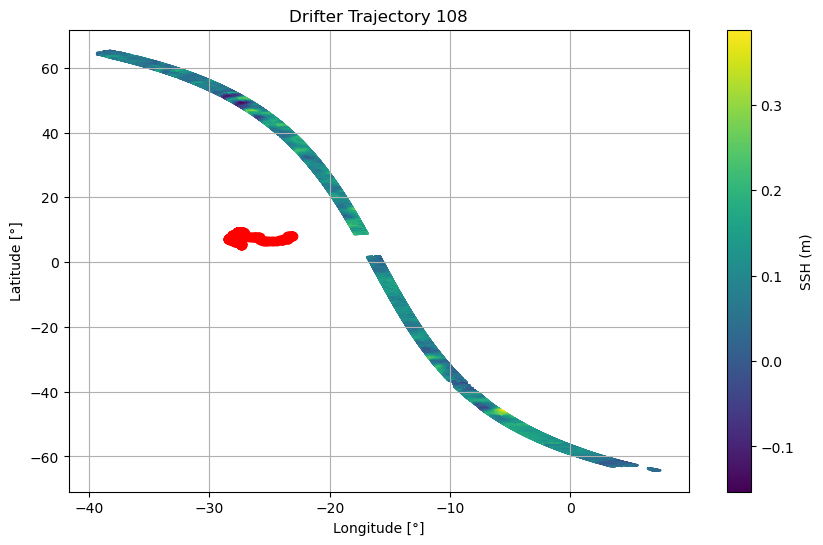

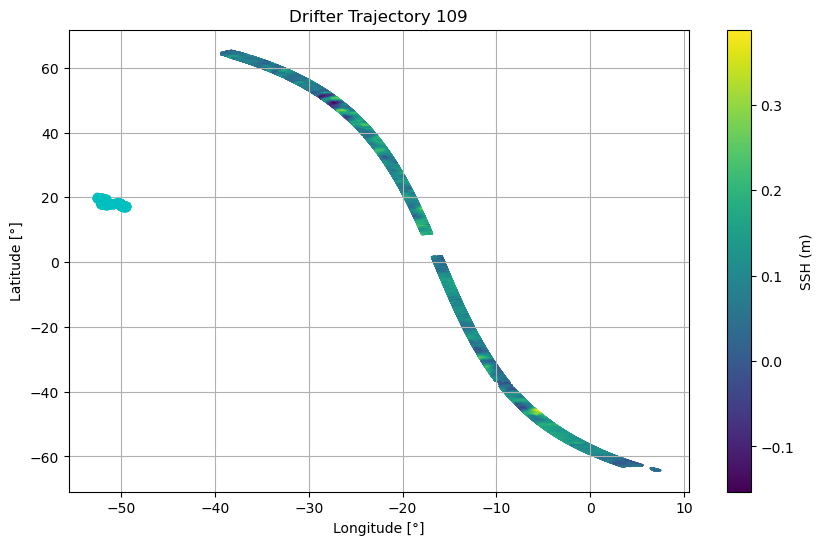

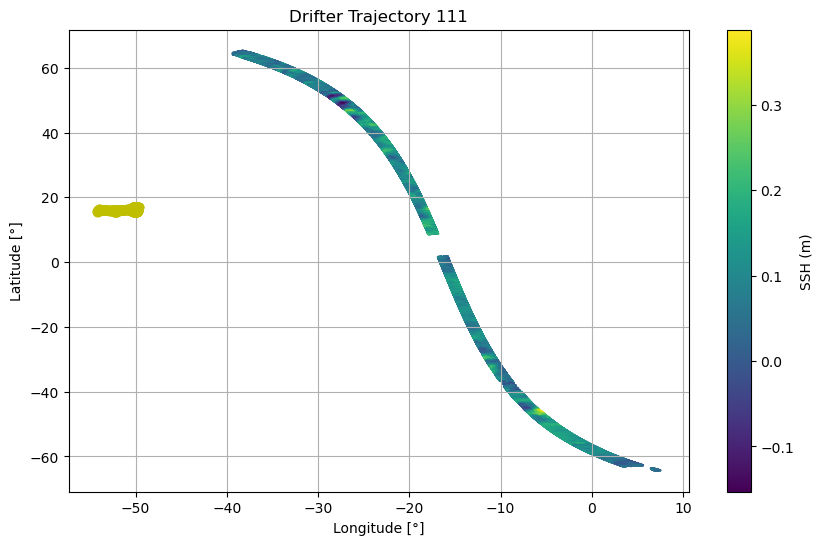

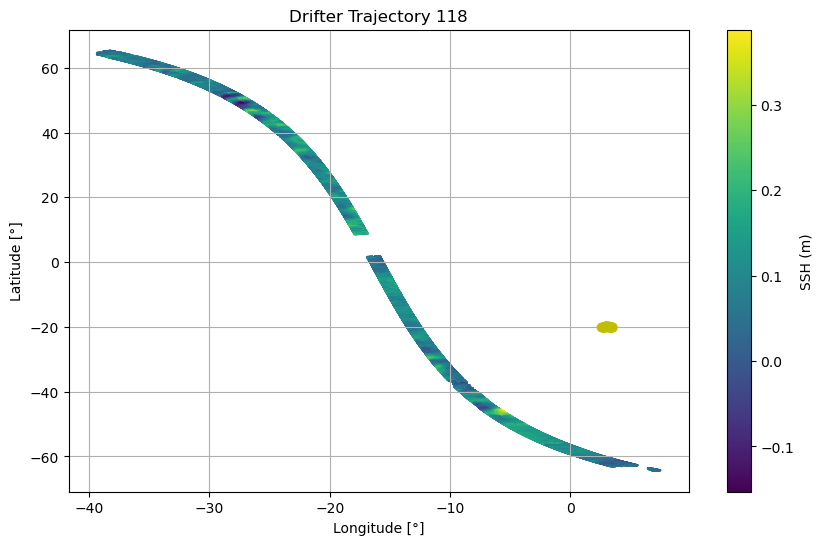

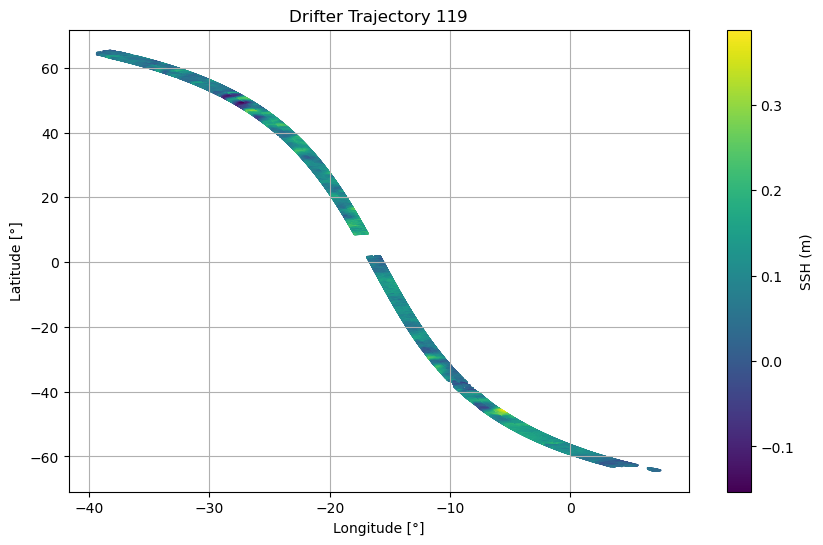

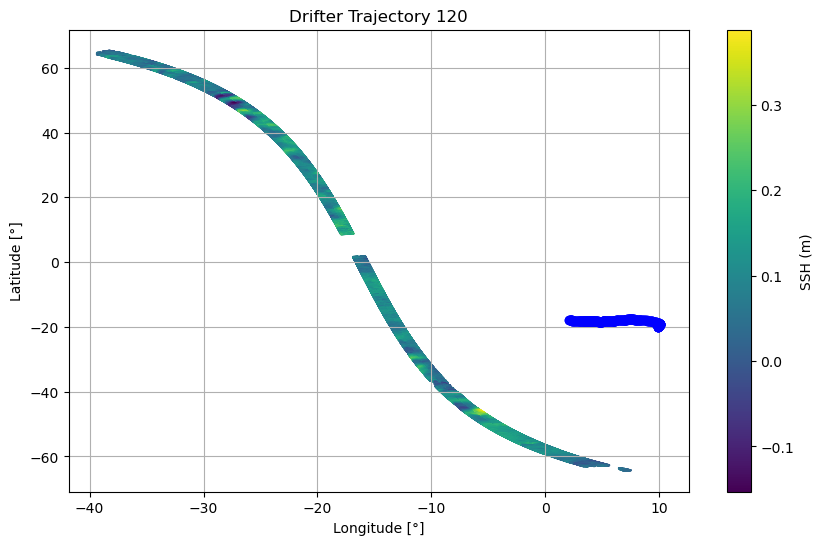

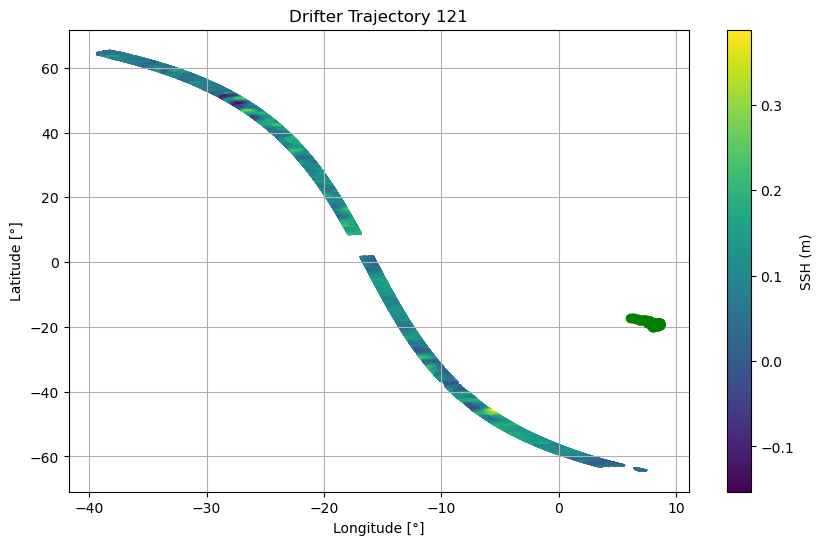

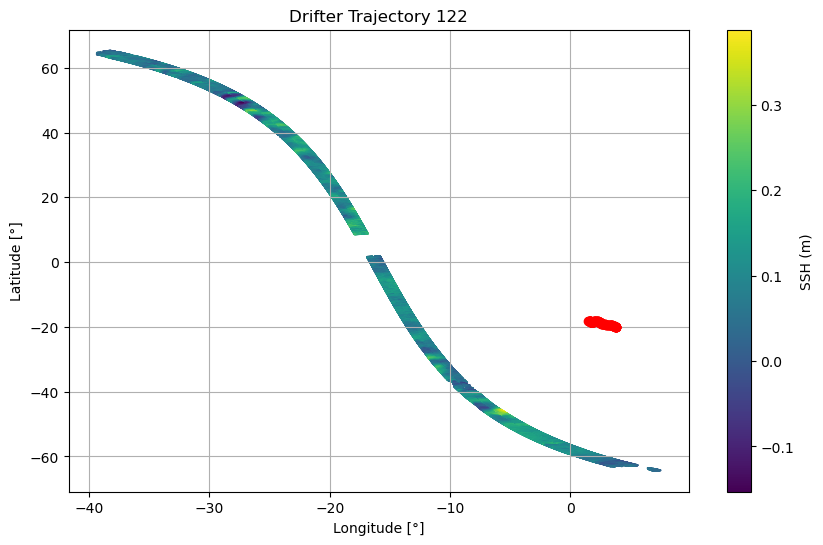

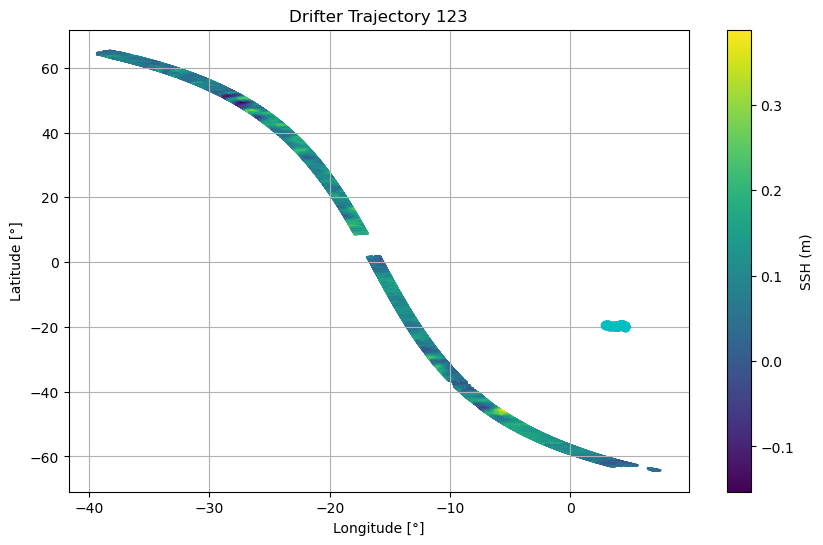

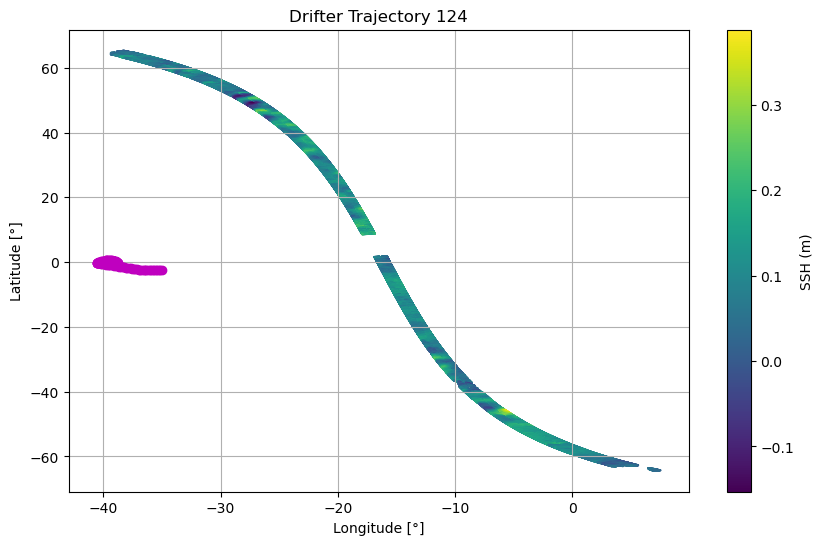

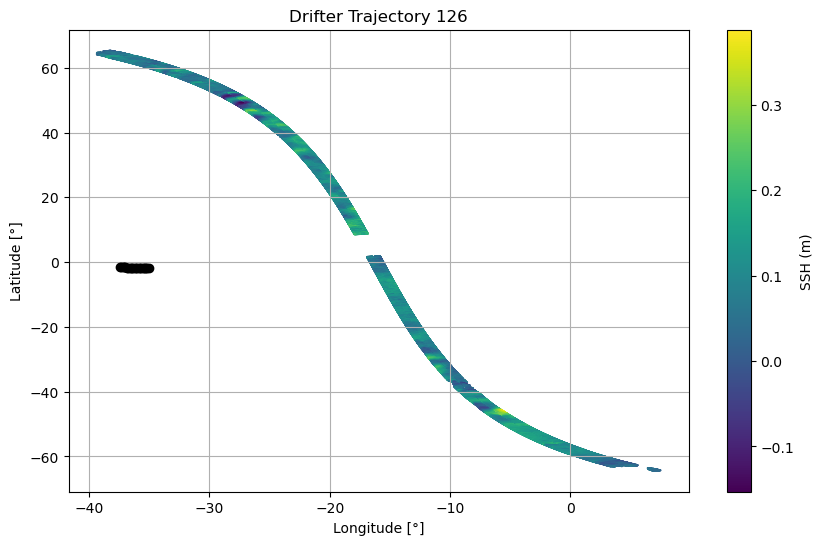

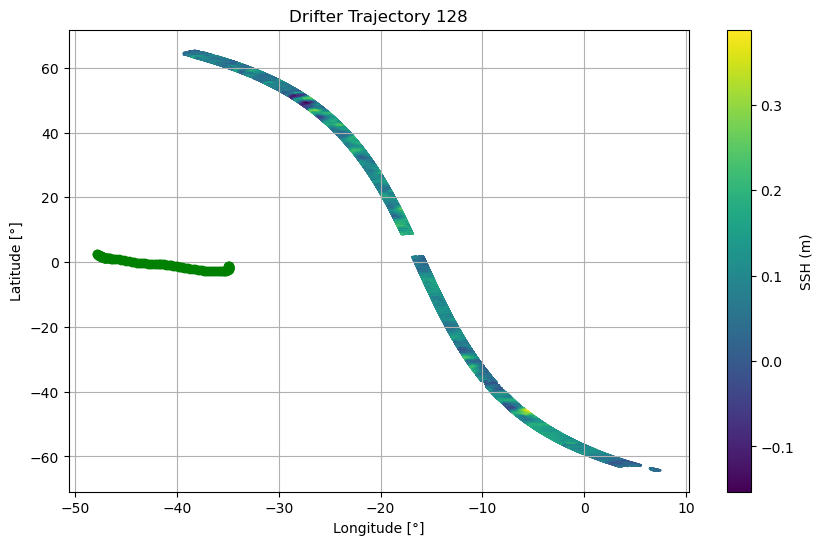

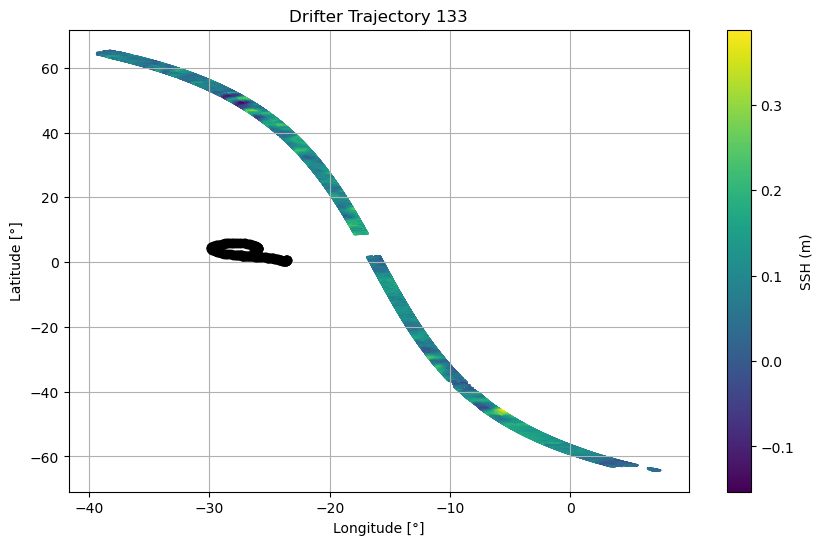

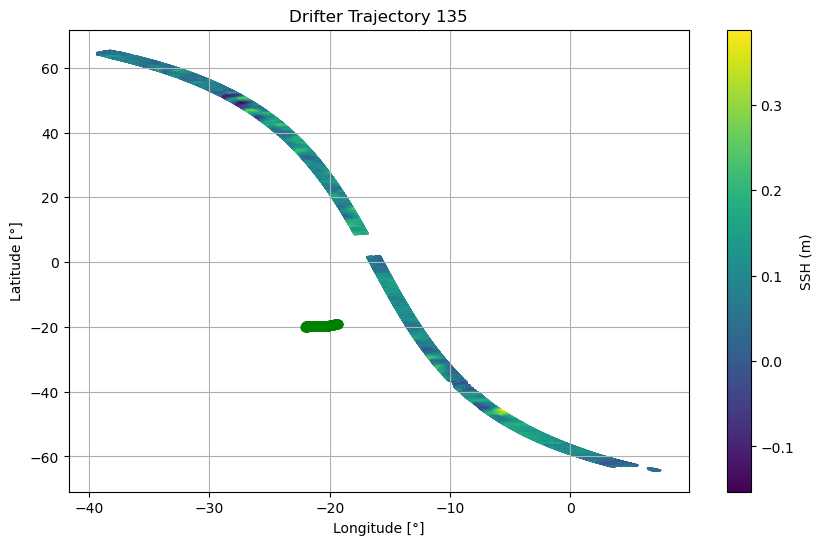

In [273]:
# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -70, 70

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

 
df = df.set_index('time')
# Calculate time differences between each sample
diff = np.roll(df.index.values, -1) - df.index.values

# Identify indices of drifters where the difference is not equal to 6 hours (21600000000000 ns)
indice_drifter = np.argwhere(diff != np.timedelta64(21600000000000, 'ns'))
indices = indice_drifter.flatten()

# List of colors for drifters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can add more colors if needed


# Visualize each drifter individually
for i in range(len(indices)):
    start_index = indices[i] + 1
    if i == len(indices) - 1:
        end_index = len(df)
    else:
        end_index = indices[i + 1]

    drifter_data = df.iloc[start_index:end_index]

    # Create a new figure for each drifter
    plt.figure(figsize=(10, 6))

    # Plot SWOT pass on the current figure
    plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')
    plt.colorbar(label='SSH (m)')
    plt.title('SWOT Sea Surface Height (SSH)')
    plt.xlabel('Longitude [°]')
    plt.ylabel('Latitude [°]')
    plt.grid(True)

    # Plot drifter trajectory on the same figure
    plt.plot(drifter_data['Longitude'], drifter_data['Latitude'], marker='o', linestyle='-', color=colors[i % len(colors)])
    plt.title(f"Drifter Trajectory {i+1}")
    plt.xlabel("Longitude [°]")
    plt.ylabel("Latitude [°]")
    plt.grid(True)
    plt.show()

## Plot 1

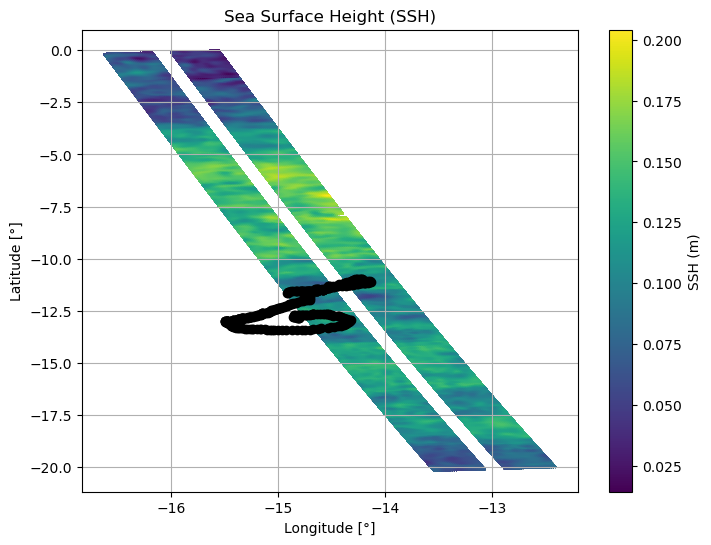

In [274]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -20, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[1040:1444], drifter_lat[1040:1444], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 2

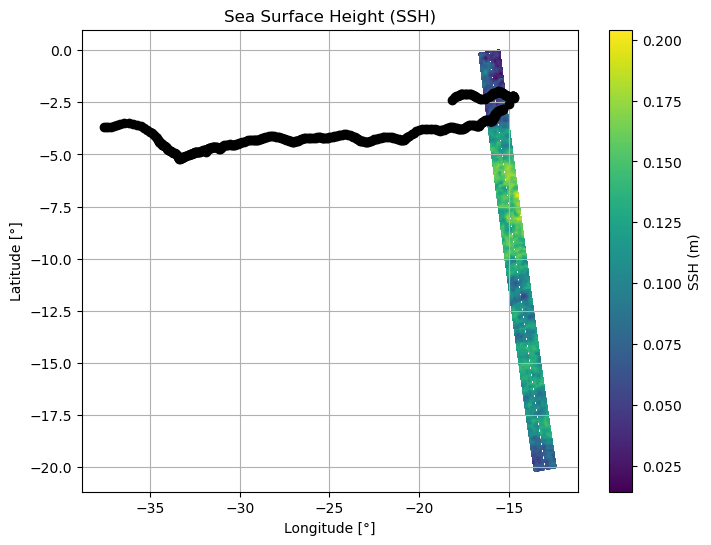

In [275]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -20, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -40) & (lon[:,0] <= -5))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[11205:11609], drifter_lat[11205:11609], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 3

In [276]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -20, 5

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -16) & (lon[:,0] <= -4))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12080:12484], drifter_lat[12080:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 4

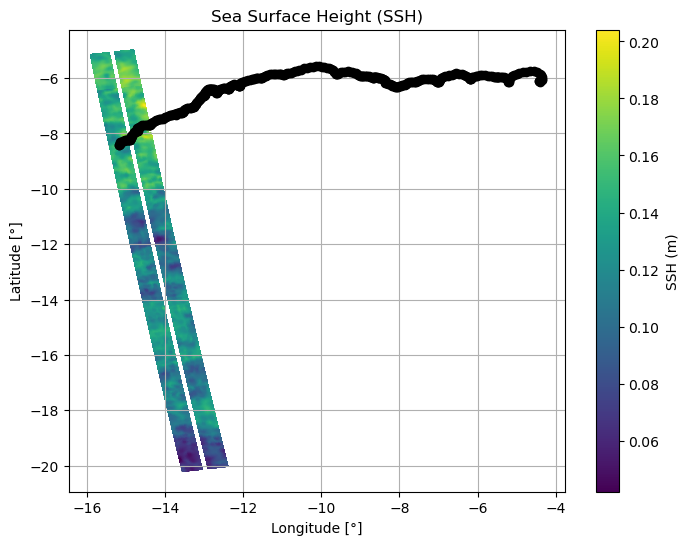

In [277]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -20, -5

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12080:12484], drifter_lat[12080:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 5

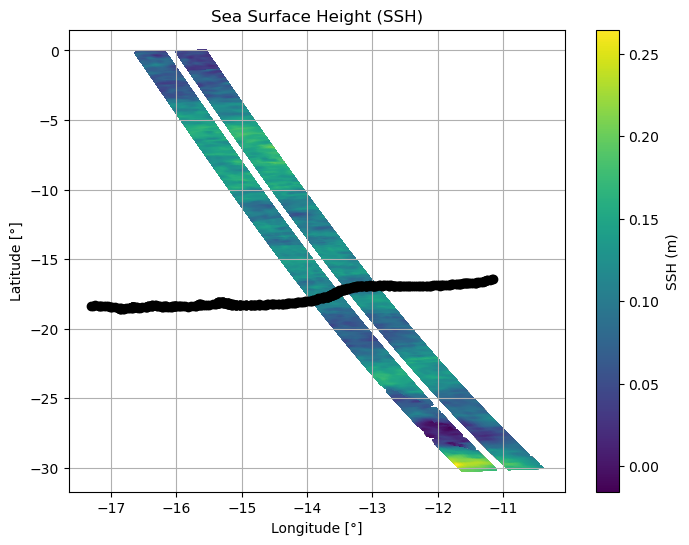

In [278]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -30, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14105:14509], drifter_lat[14105:14509], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 6

In [279]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -30, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14598:15002], drifter_lat[14598:15002], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 7

In [280]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -30, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat = lat[indlon]
lon = lon[indlon]
ssh = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon, lat, c=ssh, s=0.2, cmap='viridis')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[16198:16602], drifter_lat[16198:16602], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()